In [ ]:
pip install emoji

In [ ]:
import numpy as np
import pandas as pd
import re
import emoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import lightgbm as lgb
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from transformers import pipeline
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [ ]:
fdata = pd.read_csv('raw_compiled_tweets.csv')
fdata = fdata.drop('Unnamed: 0',axis = 1)
fdata.head()

,link,text,date,Likes,No_of_tweets
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1


In [ ]:
def classify_tweet_with_emoji(text):
    # Keywords for positive outcomes in match scorelines
    positive_keywords = ['win', 'victory', 'good', 'great', 'amazing', 'goal', 'praise', 'love', 'excellent', 'hatrick', ' top']

    # Keywords for negative outcomes in match scorelines
    negative_keywords = ['lose', 'loss', 'bad', 'poor', 'terrible', 'frustrated', 'worst', 'hate', 'disappoint', 'injury', 'injured']

    # Emoji classification as positive
    heart_emojis = ['❤️', '💙', '💜', '💖', '💗', '💓', '💕', '💞', '💘', '❣️','🔴','🔵','💪','👏','🔥']

    if any(emoji in text for emoji in heart_emojis):
        return 'positive'

    # Keywords related to scores, assuming any numbers mentioned are scorelines
    score_pattern = re.search(r'(\d+)-(\d+)', text)
    if score_pattern:
        score = re.findall(r'(\d+)-(\d+)', text)[0]
        if int(score[0]) > int(score[1]):
            return 'negative'  # Barca lost
        else:
            return 'positive'  # Barca won


    former_player_keywords = ['legend', 'cruyff', 'ronaldinho', 'messi', 'xavi', 'iniesta', 'puyol', 'johan', 'lionel']

    # Check if it's praise for former players
    if any(word in text for word in former_player_keywords):
        return 'neutral'

    # Check for positive sentiment
    if any(word in text for word in positive_keywords):
        return 'positive'

    # Check for negative sentiment
    elif any(word in text for word in negative_keywords):
        return 'negative'

    # Default to neutral if none of the above
    else:
        return 'neutral'

# Apply updated classification to the 'cleaned_text' column
fdata['classification'] = fdata['text'].apply(classify_tweet_with_emoji)

In [ ]:
fdata.head()

,link,text,date,Likes,No_of_tweets,classification
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0,positive
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0,neutral
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0,neutral
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1,neutral
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = fdata['classification'].value_counts()
print(frequencies)

classification
neutral     560
positive    351
negative     53
Name: count, dtype: int64


In [ ]:
#For Classified Set - 1
print("Classified Set 1")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(fdata['text']).toarray()

# Define the target variable
y = fdata['classification']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fdata['classification'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 1
Logistic Regression Model
Accuracy: 0.7010309278350515
Confusion Matrix:
 [[ 0  5  3]
 [ 0 53  3]
 [ 0 18 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.70      0.95      0.80        56
           2       0.71      0.45      0.56        33

    accuracy                           0.70        97
   macro avg       0.47      0.47      0.45        97
weighted avg       0.65      0.70      0.65        97

Multinomial Naive Bayes Model
Accuracy: 0.6701030927835051
Confusion Matrix:
 [[ 0  5  3]
 [ 0 53  3]
 [ 0 21 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      0.95      0.79        56
           2       0.67      0.36      0.47        33

    accuracy                           0.67        97
   macro avg       0.45      0.44      0.42        97
we

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Model
Accuracy: 0.7010309278350515
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.69      0.93      0.79        56
           2       0.71      0.45      0.56        33

    accuracy                           0.70        97
   macro avg       0.80      0.50      0.52        97
weighted avg       0.73      0.70      0.67        97



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:16:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7010309278350515
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.70      0.89      0.79        56
           2       0.68      0.52      0.59        33

    accuracy                           0.70        97
   macro avg       0.79      0.51      0.53        97
weighted avg       0.72      0.70      0.67        97

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 154
[LightGBM] [Info] Start training from score -2.958376
[LightGBM] [Info] Start training from score -0.542463
[LightGBM] [Info] Start training from score -1.002988
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.7319587628865979
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.74      0.88      0.80        56
           2       0.70      0.64      0.67        33

    accuracy                           0.73        97
   macro avg       0.81      0.55      0.56        97
weighted avg       0.75      0.73      0.71        97



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
fdata2 = pd.read_csv('raw_compiled_tweets.csv')
fdata2 = fdata2.drop('Unnamed: 0',axis = 1)
fdata2.head()

,link,text,date,Likes,No_of_tweets
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1


In [ ]:
# Function to remove URLs, emojis, and special characters
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuations and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = ' '.join([word for word in word_tokens if word not in stop_words])

    return filtered_tweet

# Apply the cleaning function to the text column
fdata2['cleaned_text'] = fdata2['text'].apply(clean_tweet)

In [ ]:
fdata2.head()

,link,text,date,Likes,No_of_tweets,cleaned_text
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0,half time laliga match alavsbara alavs barcelona lewandowski lewandowski lewandowski lewandowski first half hattrick pure class laligaeasports barca fcbarcelona
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0,visited spotify camp nou campnou barca fcb barcelona sportify
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0,one greatest time truly legend enjoy retirement iniesta barca
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1,memoriam johan johan cruijff cruyff neeskens ajax oranje barcelona fcbarcelona bara fcb
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1,johans neeskens cruyff barca


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
fdata2['sentiment'] = fdata2['cleaned_text'].apply(get_sentiment)

In [ ]:
fdata2.head()

,link,text,date,Likes,No_of_tweets,cleaned_text,sentiment
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0,half time laliga match alavsbara alavs barcelona lewandowski lewandowski lewandowski lewandowski first half hattrick pure class laligaeasports barca fcbarcelona,neutral
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0,visited spotify camp nou campnou barca fcb barcelona sportify,neutral
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0,one greatest time truly legend enjoy retirement iniesta barca,positive
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1,memoriam johan johan cruijff cruyff neeskens ajax oranje barcelona fcbarcelona bara fcb,neutral
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1,johans neeskens cruyff barca,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = fdata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    458
neutral     339
negative    167
Name: count, dtype: int64


In [ ]:
#For Classified Set - 2
print("Classified Set 2")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(fdata2['cleaned_text']).toarray()

# Define the target variable
y = fdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 2
Logistic Regression Model
Accuracy: 0.7216494845360825
Confusion Matrix:
 [[ 4  8 12]
 [ 1 27  5]
 [ 0  1 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.17      0.28        24
           1       0.75      0.82      0.78        33
           2       0.70      0.97      0.81        40

    accuracy                           0.72        97
   macro avg       0.75      0.65      0.62        97
weighted avg       0.74      0.72      0.67        97

Multinomial Naive Bayes Model
Accuracy: 0.5979381443298969
Confusion Matrix:
 [[ 2  2 20]
 [ 1 18 14]
 [ 0  2 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.08      0.15        24
           1       0.82      0.55      0.65        33
           2       0.53      0.95      0.68        40

    accuracy                           0.60        97
   macro avg       0.67      0.53      0.49        97
we

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:16:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.6701030927835051
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.33      0.42        24
           1       0.63      0.73      0.68        33
           2       0.73      0.82      0.78        40

    accuracy                           0.67        97
   macro avg       0.65      0.63      0.62        97
weighted avg       0.66      0.67      0.65        97

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 85
[LightGBM] [Info] Start training from score -1.802194
[LightGBM] [Info] Start training from score -1.041454
[LightGBM] [Info] Start training from score -0.729558


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightBGM Model
Accuracy: 0.6494845360824743
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50        24
           1       0.62      0.76      0.68        33
           2       0.68      0.70      0.69        40

    accuracy                           0.65        97
   macro avg       0.64      0.62      0.63        97
weighted avg       0.65      0.65      0.64        97



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load a sentiment analysis pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Apply the classifier to each tweet
def bert_sentiment(tweet):
    result = classifier(tweet)[0]
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Apply BERT sentiment classification
fdata2['sentiment'] = fdata2['cleaned_text'].apply(bert_sentiment)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
fdata2.head()

,link,text,date,Likes,No_of_tweets,cleaned_text,sentiment
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0,half time laliga match alavsbara alavs barcelona lewandowski lewandowski lewandowski lewandowski first half hattrick pure class laligaeasports barca fcbarcelona,positive
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0,visited spotify camp nou campnou barca fcb barcelona sportify,positive
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0,one greatest time truly legend enjoy retirement iniesta barca,positive
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1,memoriam johan johan cruijff cruyff neeskens ajax oranje barcelona fcbarcelona bara fcb,positive
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1,johans neeskens cruyff barca,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = fdata2['sentiment'].value_counts()
print(frequencies)

sentiment
negative    485
positive    479
Name: count, dtype: int64


In [ ]:
#For Classified Set - 3
print("Classified Set 3")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(fdata2['cleaned_text']).toarray()

# Define the target variable
y = fdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 3
Logistic Regression Model
Accuracy: 0.7938144329896907
Confusion Matrix:
 [[39  9]
 [11 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.81      0.78      0.79        49

    accuracy                           0.79        97
   macro avg       0.79      0.79      0.79        97
weighted avg       0.79      0.79      0.79        97

Multinomial Naive Bayes Model
Accuracy: 0.8041237113402062
Confusion Matrix:
 [[35 13]
 [ 6 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        48
           1       0.77      0.88      0.82        49

    accuracy                           0.80        97
   macro avg       0.81      0.80      0.80        97
weighted avg       0.81      0.80      0.80        97

Support Vector Machines Model
Accuracy: 0.8144329896907216
Confusion Matrix:
 [[42  6]
 [12

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7319587628865979
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        48
           1       0.78      0.65      0.71        49

    accuracy                           0.73        97
   macro avg       0.74      0.73      0.73        97
weighted avg       0.74      0.73      0.73        97

[LightGBM] [Info] Number of positive: 430, number of negative: 437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495963 -> initscore=-0.016148
[LightGBM] [Info] Start training from score -0.016148
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from textblob import TextBlob

def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Categorize polarity score into positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment classification
fdata2['sentiment'] = fdata2['cleaned_text'].apply(textblob_sentiment)

In [ ]:
fdata2.head()

,link,text,date,Likes,No_of_tweets,cleaned_text,sentiment
0,https://twitter.com/Zouqm22/status/1842949991993835826#m,Its half time in #LaLiga match #AlavésBarça Alavés 0-3 Barcelona. ⚽️ 7’: Lewandowski. (0-1) ⚽️ 22’: Lewandowski. (0-2) ⚽️ 32’: Lewandowski. (0-3) Lewandowski first half Hat-Trick is pure class #LALIGAEASPORTS #Barca #FCBarcelona,"Oct 6, 2024 · 3:28 PM UTC",12,0,half time laliga match alavsbara alavs barcelona lewandowski lewandowski lewandowski lewandowski first half hattrick pure class laligaeasports barca fcbarcelona,positive
1,https://twitter.com/ollsdav/status/1649145885878546442#m,So I visited the Spotify Camp Nou 😍 @BarcaUniversal @FCBarcelona #Campnou #Barca #FCB #Barcelona #Sportify,"Apr 20, 2023 · 8:19 PM UTC",2,0,visited spotify camp nou campnou barca fcb barcelona sportify,neutral
2,https://twitter.com/SportsaholicOnX/status/1843397774982722022#m,"One of the greatest of all time, truly a legend. Enjoy Retirement! #iniesta #barca","Oct 7, 2024 · 9:07 PM UTC",0,0,one greatest time truly legend enjoy retirement iniesta barca,positive
3,https://twitter.com/voshans/status/1843375517577425027#m,In memoriam Johan & Johan #Cruijff #Cruyff #Neeskens #Ajax #Oranje #Barcelona #FCBarcelona #Barça #FCB,"Oct 7, 2024 · 7:39 PM UTC",18,1,memoriam johan johan cruijff cruyff neeskens ajax oranje barcelona fcbarcelona bara fcb,neutral
4,https://twitter.com/LETFootball/status/1042202477117022208#m,The Johans #neeskens #cruyff #barca,"Sep 19, 2018 · 12:03 AM UTC",49,1,johans neeskens cruyff barca,neutral


In [ ]:
#For Classified Set - 4
print("Classified Set 4")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(fdata2['cleaned_text']).toarray()

# Define the target variable
y = fdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 4
Logistic Regression Model
Accuracy: 0.7422680412371134
Confusion Matrix:
 [[ 0  1  6]
 [ 0 28 14]
 [ 0  4 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.85      0.67      0.75        42
           2       0.69      0.92      0.79        48

    accuracy                           0.74        97
   macro avg       0.51      0.53      0.51        97
weighted avg       0.71      0.74      0.71        97

Multinomial Naive Bayes Model
Accuracy: 0.6391752577319587
Confusion Matrix:
 [[ 0  0  7]
 [ 0 15 27]
 [ 0  1 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.94      0.36      0.52        42
           2       0.58      0.98      0.73        48

    accuracy                           0.64        97
   macro avg       0.51      0.45      0.42        97
we

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Model
Accuracy: 0.8144329896907216
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.79      0.90      0.84        42
           2       0.83      0.83      0.83        48

    accuracy                           0.81        97
   macro avg       0.88      0.63      0.64        97
weighted avg       0.83      0.81      0.80        97



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7835051546391752
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.76      0.90      0.83        42
           2       0.88      0.73      0.80        48

    accuracy                           0.78        97
   macro avg       0.69      0.69      0.68        97
weighted avg       0.79      0.78      0.78        97

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 85
[LightGBM] [Info] Start training from score -2.221744
[LightGBM] [Info] Start training from score -1.025246
[LightGBM] [Info] Start training from score -0.629474
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.7319587628865979
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.29      0.27         7
           1       0.78      0.74      0.76        42
           2       0.78      0.79      0.78        48

    accuracy                           0.73        97
   macro avg       0.60      0.61      0.60        97
weighted avg       0.74      0.73      0.73        97



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
rdata = pd.read_csv('merged_reddit_data.csv')
rdata.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top


In [ ]:
def classify_tweet_with_emoji(text):
    # Keywords for positive outcomes in match scorelines
    positive_keywords = ['win', 'victory', 'good', 'great', 'amazing', 'goal', 'praise', 'love', 'excellent', 'hatrick', ' top']

    # Keywords for negative outcomes in match scorelines
    negative_keywords = ['lose', 'loss', 'bad', 'poor', 'terrible', 'frustrated', 'worst', 'hate', 'disappoint', 'injury', 'injured']

    # Emoji classification as positive
    heart_emojis = ['❤️', '💙', '💜', '💖', '💗', '💓', '💕', '💞', '💘', '❣️','🔴','🔵','💪','👏','🔥']

    if any(emoji in text for emoji in heart_emojis):
        return 'positive'

    # Keywords related to scores, assuming any numbers mentioned are scorelines
    score_pattern = re.search(r'(\d+)-(\d+)', text)
    if score_pattern:
        score = re.findall(r'(\d+)-(\d+)', text)[0]
        if int(score[0]) > int(score[1]):
            return 'negative'  # Barca lost
        else:
            return 'positive'  # Barca won


    former_player_keywords = ['legend', 'cruyff', 'ronaldinho', 'messi', 'xavi', 'iniesta', 'puyol', 'johan', 'lionel']

    # Check if it's praise for former players
    if any(word in text for word in former_player_keywords):
        return 'neutral'

    # Check for positive sentiment
    if any(word in text for word in positive_keywords):
        return 'positive'

    # Check for negative sentiment
    elif any(word in text for word in negative_keywords):
        return 'negative'

    # Default to neutral if none of the above
    else:
        return 'neutral'

# Apply updated classification to the 'cleaned_text' column
rdata['classification'] = rdata['Title'].apply(classify_tweet_with_emoji)

In [ ]:
rdata.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category,classification
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top,neutral
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top,neutral
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top,neutral
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top,neutral
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = rdata['classification'].value_counts()
print(frequencies)

classification
neutral     756
positive     60
negative     36
Name: count, dtype: int64


In [ ]:
#For Classified Set - 1
print("Classified Set 1")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(rdata['Title']).toarray()

# Define the target variable
y = rdata['classification']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(rdata['classification'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 1
Logistic Regression Model
Accuracy: 0.9418604651162791
Confusion Matrix:
 [[ 0  2  0]
 [ 0 81  0]
 [ 0  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.94      1.00      0.97        81
           2       0.00      0.00      0.00         3

    accuracy                           0.94        86
   macro avg       0.31      0.33      0.32        86
weighted avg       0.89      0.94      0.91        86

Multinomial Naive Bayes Model
Accuracy: 0.9418604651162791
Confusion Matrix:
 [[ 0  2  0]
 [ 0 81  0]
 [ 0  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.94      1.00      0.97        81
           2       0.00      0.00      0.00         3

    accuracy                           0.94        86
   macro avg       0.31      0.33      0.32        86
we

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Model
Accuracy: 0.9418604651162791
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.95      0.99      0.97        81
           2       0.00      0.00      0.00         3

    accuracy                           0.94        86
   macro avg       0.65      0.50      0.55        86
weighted avg       0.92      0.94      0.93        86



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9418604651162791
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.95      0.99      0.97        81
           2       0.00      0.00      0.00         3

    accuracy                           0.94        86
   macro avg       0.65      0.50      0.55        86
weighted avg       0.92      0.94      0.93        86

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 766, number of used features: 54
[LightGBM] [Info] Start training from score -3.114822
[LightGBM] [Info] Start training from score -0.126469
[LightGBM] [Info] Start training from score -2.598131
[LightGBM] [Warning] No further splits w

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
rdata2 = pd.read_csv('merged_reddit_data.csv')
rdata2.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top


In [ ]:
# Function to remove URLs, emojis, and special characters
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuations and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = ' '.join([word for word in word_tokens if word not in stop_words])

    return filtered_tweet

# Apply the cleaning function to the text column
rdata2['cleaned_text'] = rdata2['Title'].apply(clean_tweet)

In [ ]:
rdata2.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category,cleaned_text
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top,lamine yamal shares letter received fan todays match translation second slide
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top,iniesta makes retirement announcement day joined la masia
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top,barcelona real madrid fans organized joint anti government march tbilisi georgia
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top,fc barcelona highest salaries laporta elected compared season
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top,forgotten barca legend still deciding matches


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
rdata2['sentiment'] = rdata2['cleaned_text'].apply(get_sentiment)

In [ ]:
rdata2.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category,cleaned_text,sentiment
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top,lamine yamal shares letter received fan todays match translation second slide,positive
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top,iniesta makes retirement announcement day joined la masia,neutral
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top,barcelona real madrid fans organized joint anti government march tbilisi georgia,negative
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top,fc barcelona highest salaries laporta elected compared season,neutral
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top,forgotten barca legend still deciding matches,negative


In [ ]:
# Find frequencies of unique elements in the column
frequencies = rdata2['sentiment'].value_counts()
print(frequencies)

sentiment
neutral     533
positive    214
negative    105
Name: count, dtype: int64


In [ ]:
#For Classified Set - 2
print("Classified Set 2")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(rdata2['cleaned_text']).toarray()

# Define the target variable
y = rdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(rdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 2
Logistic Regression Model
Accuracy: 0.7441860465116279
Confusion Matrix:
 [[ 0  7  0]
 [ 0 58  0]
 [ 0 15  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.72      1.00      0.84        58
           2       1.00      0.29      0.44        21

    accuracy                           0.74        86
   macro avg       0.58      0.43      0.43        86
weighted avg       0.73      0.74      0.68        86

Multinomial Naive Bayes Model
Accuracy: 0.7441860465116279
Confusion Matrix:
 [[ 0  7  0]
 [ 0 58  0]
 [ 0 15  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.72      1.00      0.84        58
           2       1.00      0.29      0.44        21

    accuracy                           0.74        86
   macro avg       0.58      0.43      0.43        86
we

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Model
Accuracy: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      0.97      0.85        58
           2       0.91      0.48      0.62        21

    accuracy                           0.77        86
   macro avg       0.56      0.48      0.49        86
weighted avg       0.73      0.77      0.72        86



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7209302325581395
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.75      0.91      0.82        58
           2       0.75      0.43      0.55        21

    accuracy                           0.72        86
   macro avg       0.50      0.45      0.46        86
weighted avg       0.69      0.72      0.69        86

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 766, number of used features: 21
[LightGBM] [Info] Start training from score -2.056215
[LightGBM] [Info] Start training from score -0.477867
[LightGBM] [Info] Start training from score -1.378492
[LightGBM] [Warning] No further splits w

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load a sentiment analysis pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Apply the classifier to each tweet
def bert_sentiment(tweet):
    result = classifier(tweet)[0]
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Apply BERT sentiment classification
rdata2['sentiment'] = rdata2['cleaned_text'].apply(bert_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
rdata2.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category,cleaned_text,sentiment
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top,lamine yamal shares letter received fan todays match translation second slide,negative
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top,iniesta makes retirement announcement day joined la masia,positive
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top,barcelona real madrid fans organized joint anti government march tbilisi georgia,negative
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top,fc barcelona highest salaries laporta elected compared season,positive
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top,forgotten barca legend still deciding matches,negative


In [ ]:
# Find frequencies of unique elements in the column
frequencies = rdata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    494
negative    358
Name: count, dtype: int64


In [ ]:
#For Classified Set - 3
print("Classified Set 3")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(rdata2['cleaned_text']).toarray()

# Define the target variable
y = rdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(rdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 3
Logistic Regression Model
Accuracy: 0.6976744186046512
Confusion Matrix:
 [[10 23]
 [ 3 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.30      0.43        33
           1       0.68      0.94      0.79        53

    accuracy                           0.70        86
   macro avg       0.73      0.62      0.61        86
weighted avg       0.72      0.70      0.66        86

Multinomial Naive Bayes Model
Accuracy: 0.7093023255813954
Confusion Matrix:
 [[10 23]
 [ 2 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.30      0.44        33
           1       0.69      0.96      0.80        53

    accuracy                           0.71        86
   macro avg       0.76      0.63      0.62        86
weighted avg       0.74      0.71      0.67        86

Support Vector Machines Model
Accuracy: 0.7209302325581395
Confusion Matrix:
 [[18 15]
 [ 9

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.6162790697674418
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35        33
           1       0.65      0.83      0.73        53

    accuracy                           0.62        86
   macro avg       0.57      0.55      0.54        86
weighted avg       0.59      0.62      0.58        86

[LightGBM] [Info] Number of positive: 441, number of negative: 325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 766, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.575718 -> initscore=0.305220
[LightGBM] [Info] Start training from score 0.305220
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from textblob import TextBlob

def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Categorize polarity score into positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment classification
rdata2['sentiment'] = rdata2['cleaned_text'].apply(textblob_sentiment)

In [ ]:
rdata2.head()

,Title,Score,ID,URL,Created_UTC,Num_Comments,Category,cleaned_text,sentiment
0,Lamine Yamal shares letter he received from a fan after todays match (translation in second slide),2056,1ig5urq,https://www.reddit.com/gallery/1ig5urq,2025-02-02 19:50:09,38,top,lamine yamal shares letter received fan todays match translation second slide,neutral
1,Iniesta makes his retirement announcement on the day he joined La Masia,2038,1fto35t,https://www.reddit.com/gallery/1fto35t,2024-10-01 13:27:33,40,top,iniesta makes retirement announcement day joined la masia,neutral
2,"Barcelona and Real Madrid fans organized joint anti government march in Tbilisi, Georgia",1763,1hfqt7m,https://www.reddit.com/gallery/1hfqt7m,2024-12-16 19:10:04,43,top,barcelona real madrid fans organized joint anti government march tbilisi georgia,positive
3,Fc Barcelona 10 highest salaries when Laporta was elected compared to this season.,1753,1hv3mul,https://www.reddit.com/gallery/1hv3mul,2025-01-06 16:55:11,340,top,fc barcelona highest salaries laporta elected compared season,neutral
4,Forgotten Barca legend still deciding matches at 37,1705,1gm2mjo,https://www.reddit.com/gallery/1gm2mjo,2024-11-07 22:09:04,74,top,forgotten barca legend still deciding matches,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = rdata2['sentiment'].value_counts()
print(frequencies)

sentiment
neutral     555
positive    214
negative     83
Name: count, dtype: int64


In [ ]:
#For Classified Set - 4
print("Classified Set 4")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(rdata2['cleaned_text']).toarray()

# Define the target variable
y = rdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(rdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 4
Logistic Regression Model
Accuracy: 0.7325581395348837
Confusion Matrix:
 [[ 3  4  0]
 [ 0 51  0]
 [ 0 19  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.69      1.00      0.82        51
           2       1.00      0.32      0.49        28

    accuracy                           0.73        86
   macro avg       0.90      0.58      0.63        86
weighted avg       0.82      0.73      0.69        86

Multinomial Naive Bayes Model
Accuracy: 0.6162790697674418
Confusion Matrix:
 [[ 0  7  0]
 [ 0 51  0]
 [ 0 26  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      1.00      0.76        51
           2       1.00      0.07      0.13        28

    accuracy                           0.62        86
   macro avg       0.54      0.36      0.30        86
we

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model
Accuracy: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.72      1.00      0.84        51
           2       1.00      0.43      0.60        28

    accuracy                           0.77        86
   macro avg       0.91      0.62      0.68        86
weighted avg       0.83      0.77      0.74        86



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:19:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7325581395348837
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.70      0.96      0.81        51
           2       0.85      0.39      0.54        28

    accuracy                           0.73        86
   macro avg       0.85      0.59      0.65        86
weighted avg       0.77      0.73      0.70        86

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 766, number of used features: 21
[LightGBM] [Info] Start training from score -2.310449
[LightGBM] [Info] Start training from score -0.418606
[LightGBM] [Info] Start training from score -1.415435
[LightGBM] [Warning] No further splits w

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
'''
# Load datasets
reddit_df = pd.read_csv('merged_reddit_data.csv')
twitter_df = pd.read_csv('raw_compiled_tweets.csv')

# Inspect to find the relevant text columns
print("Reddit columns:", reddit_df.columns)
print("Twitter columns:", twitter_df.columns)

reddit_texts = reddit_df[['Title']].rename(columns={'Title': 'text'})
twitter_texts = twitter_df[['text']]

# Combine both into one DataFrame
combined_df = pd.concat([reddit_texts, twitter_texts], ignore_index=True)

# Reshuffling the entire DataFrame
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Save to a new CSV File
combined_df.to_csv('combined_text_data.csv', index=False)
'''

Reddit columns: Index(['Title', 'Score', 'ID', 'URL', 'Created_UTC', 'Num_Comments',
       'Category'],
      dtype='object')
Twitter columns: Index(['Unnamed: 0', 'link', 'text', 'date', 'Likes', 'No_of_tweets'], dtype='object')
                                                                                                                                                                                                                                                                   text
0                                                                                                                                                                                                                     Does anyone else here troll the Real Madrid sub? 
1                                                                                                                                                                                          My dad only likes #Barca because I love #RealMadrid 🤍🤍

In [ ]:
cdata = pd.read_csv('combined_text_data.csv')
cdata.head()

,text
0,Does anyone else here troll the Real Madrid sub?
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.
3,WALLPAPERS | FC Barcelona 2-2 Atalanta
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela


In [ ]:
def classify_tweet_with_emoji(text):
    # Keywords for positive outcomes in match scorelines
    positive_keywords = ['win', 'victory', 'good', 'great', 'amazing', 'goal', 'praise', 'love', 'excellent', 'hatrick', ' top']

    # Keywords for negative outcomes in match scorelines
    negative_keywords = ['lose', 'loss', 'bad', 'poor', 'terrible', 'frustrated', 'worst', 'hate', 'disappoint', 'injury', 'injured']

    # Emoji classification as positive
    heart_emojis = ['❤️', '💙', '💜', '💖', '💗', '💓', '💕', '💞', '💘', '❣️','🔴','🔵','💪','👏','🔥']

    if any(emoji in text for emoji in heart_emojis):
        return 'positive'

    # Keywords related to scores, assuming any numbers mentioned are scorelines
    score_pattern = re.search(r'(\d+)-(\d+)', text)
    if score_pattern:
        score = re.findall(r'(\d+)-(\d+)', text)[0]
        if int(score[0]) > int(score[1]):
            return 'negative'  # Barca lost
        else:
            return 'positive'  # Barca won


    former_player_keywords = ['legend', 'cruyff', 'ronaldinho', 'messi', 'xavi', 'iniesta', 'puyol', 'johan', 'lionel']

    # Check if it's praise for former players
    if any(word in text for word in former_player_keywords):
        return 'neutral'

    # Check for positive sentiment
    if any(word in text for word in positive_keywords):
        return 'positive'

    # Check for negative sentiment
    elif any(word in text for word in negative_keywords):
        return 'negative'

    # Default to neutral if none of the above
    else:
        return 'neutral'

# Apply updated classification to the 'cleaned_text' column
cdata['classification'] = cdata['text'].apply(classify_tweet_with_emoji)

In [ ]:
cdata.head()

,text,classification
0,Does anyone else here troll the Real Madrid sub?,neutral
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐,positive
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.,neutral
3,WALLPAPERS | FC Barcelona 2-2 Atalanta,positive
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cdata['classification'].value_counts()
print(frequencies)

classification
neutral     1316
positive     411
negative      89
Name: count, dtype: int64


In [ ]:
#For Classified Set - 1
print("Classified Set 1")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cdata['text']).toarray()

# Define the target variable
y = cdata['classification']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cdata['classification'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 1
Logistic Regression Model
Accuracy: 0.8406593406593407
Confusion Matrix:
 [[  0   8   2]
 [  0 135   1]
 [  0  18  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.84      0.99      0.91       136
           2       0.86      0.50      0.63        36

    accuracy                           0.84       182
   macro avg       0.57      0.50      0.51       182
weighted avg       0.80      0.84      0.80       182

Multinomial Naive Bayes Model
Accuracy: 0.7637362637362637
Confusion Matrix:
 [[  0  10   0]
 [  0 136   0]
 [  0  33   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.76      1.00      0.86       136
           2       1.00      0.08      0.15        36

    accuracy                           0.76       182
   macro avg       0.59      0.36     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Support Vector Machines Model
Accuracy: 0.8846153846153846
Confusion Matrix:
 [[  3   5   2]
 [  0 133   3]
 [  0  11  25]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.89      0.98      0.93       136
           2       0.83      0.69      0.76        36

    accuracy                           0.88       182
   macro avg       0.91      0.66      0.72       182
weighted avg       0.89      0.88      0.87       182

Random Forest Model
Accuracy: 0.8351648351648352
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.83      0.99      0.90       136
           2       0.84      0.44      0.58        36

    accuracy                           0.84       182
   macro avg       0.89      0.54      0.61       182
weighted avg       0.84      0.84      0.81       182



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.8901098901098901
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.92      0.96      0.94       136
           2       0.77      0.83      0.80        36

    accuracy                           0.89       182
   macro avg       0.90      0.66      0.69       182
weighted avg       0.90      0.89      0.88       182

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4786
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 206
[LightGBM] [Info] Start training from score -3.029338
[LightGBM] [Info] Start training from score -0.325517
[LightGBM] [Info] Start training from score -1.471860


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.90      0.93      0.92       136
           2       0.73      0.75      0.74        36

    accuracy                           0.86       182
   macro avg       0.71      0.63      0.65       182
weighted avg       0.84      0.86      0.85       182



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
cdata2 = pd.read_csv('combined_text_data.csv')
cdata2.head()

,text
0,Does anyone else here troll the Real Madrid sub?
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.
3,WALLPAPERS | FC Barcelona 2-2 Atalanta
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela


In [ ]:
# Function to remove URLs, emojis, and special characters
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuations and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = ' '.join([word for word in word_tokens if word not in stop_words])

    return filtered_tweet

# Apply the cleaning function to the text column
cdata2['cleaned_text'] = cdata2['text'].apply(clean_tweet)

In [ ]:
cdata2.head()

,text,cleaned_text
0,Does anyone else here troll the Real Madrid sub?,anyone else troll real madrid sub
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐,dad likes barca love realmadrid halamadrid
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.,loan watch bara loan striker vitor roque started today betis match mallorca played minutes without highlights today
3,WALLPAPERS | FC Barcelona 2-2 Atalanta,wallpapers fc barcelona atalanta
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela,invite visit collections available jpgstore already nft minted sale cardano nft cardanocommunity cardanomithr nftsales nftsale tornado barca ocean turtle tornado caracas venezuela


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
cdata2['sentiment'] = cdata2['cleaned_text'].apply(get_sentiment)

In [ ]:
cdata2.head()

,text,cleaned_text,sentiment
0,Does anyone else here troll the Real Madrid sub?,anyone else troll real madrid sub,neutral
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐,dad likes barca love realmadrid halamadrid,positive
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.,loan watch bara loan striker vitor roque started today betis match mallorca played minutes without highlights today,positive
3,WALLPAPERS | FC Barcelona 2-2 Atalanta,wallpapers fc barcelona atalanta,neutral
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela,invite visit collections available jpgstore already nft minted sale cardano nft cardanocommunity cardanomithr nftsales nftsale tornado barca ocean turtle tornado caracas venezuela,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cdata2['sentiment'].value_counts()
print(frequencies)

sentiment
neutral     872
positive    672
negative    272
Name: count, dtype: int64


In [ ]:
#For Classified Set - 2
print("Classified Set 2")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cdata2['cleaned_text']).toarray()

# Define the target variable
y = cdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 2
Logistic Regression Model
Accuracy: 0.7857142857142857
Confusion Matrix:
 [[ 7 12  8]
 [ 2 84  7]
 [ 0 10 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.26      0.39        27
           1       0.79      0.90      0.84        93
           2       0.78      0.84      0.81        62

    accuracy                           0.79       182
   macro avg       0.78      0.67      0.68       182
weighted avg       0.78      0.79      0.76       182

Multinomial Naive Bayes Model
Accuracy: 0.7087912087912088
Confusion Matrix:
 [[ 1 13 13]
 [ 0 81 12]
 [ 0 15 47]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07        27
           1       0.74      0.87      0.80        93
           2       0.65      0.76      0.70        62

    accuracy                           0.71       182
   macro avg       0.80      0.56      0.52       182
we

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:49:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.8351648351648352
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.48      0.62        27
           1       0.81      0.97      0.88        93
           2       0.88      0.79      0.83        62

    accuracy                           0.84       182
   macro avg       0.85      0.75      0.78       182
weighted avg       0.84      0.84      0.83       182

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 119
[LightGBM] [Info] Start training from score -1.897528
[LightGBM] [Info] Start training from score -0.740775
[LightGBM] [Info] Start training from score -0.985327


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.7417582417582418
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.37      0.47        27
           1       0.76      0.86      0.81        93
           2       0.74      0.73      0.73        62

    accuracy                           0.74       182
   macro avg       0.71      0.65      0.67       182
weighted avg       0.73      0.74      0.73       182



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load a sentiment analysis pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Apply the classifier to each tweet
def bert_sentiment(tweet):
    result = classifier(tweet)[0]
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Apply BERT sentiment classification
cdata2['sentiment'] = cdata2['cleaned_text'].apply(bert_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
cdata2.head()

,text,cleaned_text,sentiment
0,Does anyone else here troll the Real Madrid sub?,anyone else troll real madrid sub,negative
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐,dad likes barca love realmadrid halamadrid,positive
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.,loan watch bara loan striker vitor roque started today betis match mallorca played minutes without highlights today,negative
3,WALLPAPERS | FC Barcelona 2-2 Atalanta,wallpapers fc barcelona atalanta,positive
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela,invite visit collections available jpgstore already nft minted sale cardano nft cardanocommunity cardanomithr nftsales nftsale tornado barca ocean turtle tornado caracas venezuela,negative


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cdata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    973
negative    843
Name: count, dtype: int64


In [ ]:
#For Classified Set - 3
print("Classified Set 3")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cdata2['cleaned_text']).toarray()

# Define the target variable
y = cdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 3
Logistic Regression Model
Accuracy: 0.6428571428571429
Confusion Matrix:
 [[54 31]
 [34 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62        85
           1       0.67      0.65      0.66        97

    accuracy                           0.64       182
   macro avg       0.64      0.64      0.64       182
weighted avg       0.64      0.64      0.64       182

Multinomial Naive Bayes Model
Accuracy: 0.6703296703296703
Confusion Matrix:
 [[43 42]
 [18 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59        85
           1       0.65      0.81      0.72        97

    accuracy                           0.67       182
   macro avg       0.68      0.66      0.66       182
weighted avg       0.68      0.67      0.66       182

Support Vector Machines Model
Accuracy: 0.6978021978021978
Confusion Matrix:
 [[60 25]
 [30

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:53:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.6648351648351648
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65        85
           1       0.70      0.66      0.68        97

    accuracy                           0.66       182
   macro avg       0.66      0.67      0.66       182
weighted avg       0.67      0.66      0.67       182

[LightGBM] [Info] Number of positive: 876, number of negative: 758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536108 -> initscore=0.144683
[LightGBM] [Info] Start training from score 0.144683


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.6373626373626373
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58        85
           1       0.64      0.72      0.68        97

    accuracy                           0.64       182
   macro avg       0.64      0.63      0.63       182
weighted avg       0.64      0.64      0.63       182



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from textblob import TextBlob

def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Categorize polarity score into positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment classification
cdata2['sentiment'] = cdata2['cleaned_text'].apply(textblob_sentiment)

In [ ]:
cdata2.head()

,text,cleaned_text,sentiment
0,Does anyone else here troll the Real Madrid sub?,anyone else troll real madrid sub,positive
1,My dad only likes #Barca because I love #RealMadrid 🤍🤍🤍🤍 #HalaMadrid 😒😒😒😒🧐,dad likes barca love realmadrid halamadrid,positive
2,‼️ Loan Watch: #Barça loan striker Vitor Roque started today for Betis in their match against Mallorca. He played 69 minutes without any highlights from him today.,loan watch bara loan striker vitor roque started today betis match mallorca played minutes without highlights today,neutral
3,WALLPAPERS | FC Barcelona 2-2 Atalanta,wallpapers fc barcelona atalanta,neutral
4,We invite you to visit some of our 40 collections available at jpg.store where we already have more than 7150 NFT minted and for sale. #cardano #NFT #CardanoCommunity #cardanomithr #NFTsales #nftsale #tornado #Barca #ocean #turtle #tornado #caracas #venezuela,invite visit collections available jpgstore already nft minted sale cardano nft cardanocommunity cardanomithr nftsales nftsale tornado barca ocean turtle tornado caracas venezuela,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cdata2['sentiment'].value_counts()
print(frequencies)

sentiment
neutral     908
positive    724
negative    184
Name: count, dtype: int64


In [ ]:
#For Classified Set - 4
print("Classified Set 4")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cdata2['cleaned_text']).toarray()

# Define the target variable
y = cdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 4
Logistic Regression Model
Accuracy: 0.8406593406593407
Confusion Matrix:
 [[ 4  8  6]
 [ 0 96  1]
 [ 0 14 53]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.22      0.36        18
           1       0.81      0.99      0.89        97
           2       0.88      0.79      0.83        67

    accuracy                           0.84       182
   macro avg       0.90      0.67      0.70       182
weighted avg       0.86      0.84      0.82       182

Multinomial Naive Bayes Model
Accuracy: 0.7527472527472527
Confusion Matrix:
 [[ 0  6 12]
 [ 0 88  9]
 [ 0 18 49]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.79      0.91      0.84        97
           2       0.70      0.73      0.72        67

    accuracy                           0.75       182
   macro avg       0.50      0.55      0.52       182
weighted avg       0.68      0.75      0.71       182

Support Vector Machines Model
Accuracy: 0.8846153846153846
Confusion Matrix:
 [[10  2  6]
 [ 0 95  2]
 [ 0 11 56]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.71        18
           1       0.88      0.98      0.93        97
           2       0.88      0.84      0.85        67

    accuracy                           0.88       182
   macro avg       0.92      0.79      0.83       182
weighted avg       0.89      0.88      0.88       182

Random Forest Model
Accuracy: 0.9010989010989011
Classification Report:
   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:54:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9120879120879121
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.92      0.97      0.94        97
           2       0.91      0.88      0.89        67

    accuracy                           0.91       182
   macro avg       0.90      0.86      0.88       182
weighted avg       0.91      0.91      0.91       182

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 119
[LightGBM] [Info] Start training from score -2.286798
[LightGBM] [Info] Start training from score -0.700518
[LightGBM] [Info] Start training from score -0.911102


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.7967032967032966
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.43        18
           1       0.81      0.89      0.85        97
           2       0.80      0.79      0.80        67

    accuracy                           0.80       182
   macro avg       0.74      0.67      0.69       182
weighted avg       0.79      0.80      0.79       182



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
odata = pd.read_csv('merged_olmo_reg_data.csv')
odata.head()

,Title
0,Barcelona 1:1 outlook for the Summer 2025/26
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io)
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about."
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending"
4,No signing then?


In [ ]:
def classify_tweet_with_emoji(text):
    # Keywords for positive outcomes in match scorelines
    positive_keywords = ['win', 'victory', 'good', 'great', 'amazing', 'goal', 'praise', 'love', 'excellent', 'hatrick', ' top']

    # Keywords for negative outcomes in match scorelines
    negative_keywords = ['lose', 'loss', 'bad', 'poor', 'terrible', 'frustrated', 'worst', 'hate', 'disappoint', 'injury', 'injured']

    # Emoji classification as positive
    heart_emojis = ['❤️', '💙', '💜', '💖', '💗', '💓', '💕', '💞', '💘', '❣️','🔴','🔵','💪','👏','🔥']

    if any(emoji in text for emoji in heart_emojis):
        return 'positive'

    # Keywords related to scores, assuming any numbers mentioned are scorelines
    score_pattern = re.search(r'(\d+)-(\d+)', text)
    if score_pattern:
        score = re.findall(r'(\d+)-(\d+)', text)[0]
        if int(score[0]) > int(score[1]):
            return 'negative'  # Barca lost
        else:
            return 'positive'  # Barca won


    former_player_keywords = ['legend', 'cruyff', 'ronaldinho', 'messi', 'xavi', 'iniesta', 'puyol', 'johan', 'lionel']

    # Check if it's praise for former players
    if any(word in text for word in former_player_keywords):
        return 'neutral'

    # Check for positive sentiment
    if any(word in text for word in positive_keywords):
        return 'positive'

    # Check for negative sentiment
    elif any(word in text for word in negative_keywords):
        return 'negative'

    # Default to neutral if none of the above
    else:
        return 'neutral'

# Apply updated classification to the 'cleaned_text' column
odata['classification'] = odata['Title'].apply(classify_tweet_with_emoji)

In [ ]:
odata.head()

,Title,classification
0,Barcelona 1:1 outlook for the Summer 2025/26,neutral
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io),neutral
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about.",neutral
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending",neutral
4,No signing then?,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = odata['classification'].value_counts()
print(frequencies)

classification
neutral     191
positive     36
negative     15
Name: count, dtype: int64


In [ ]:
#For Classified Set - 1
print("Classified Set 1")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(odata['Title']).toarray()

# Define the target variable
y = odata['classification']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(odata['classification'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 1
Logistic Regression Model
Accuracy: 0.76
Confusion Matrix:
 [[ 0  1  0]
 [ 0 19  0]
 [ 0  5  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.76      1.00      0.86        19
           2       0.00      0.00      0.00         5

    accuracy                           0.76        25
   macro avg       0.25      0.33      0.29        25
weighted avg       0.58      0.76      0.66        25

Multinomial Naive Bayes Model
Accuracy: 0.76
Confusion Matrix:
 [[ 0  1  0]
 [ 0 19  0]
 [ 0  5  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.76      1.00      0.86        19
           2       0.00      0.00      0.00         5

    accuracy                           0.76        25
   macro avg       0.25      0.33      0.29        25
weighted avg       0.58      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Support Vector Machines Model
Accuracy: 0.8
Confusion Matrix:
 [[ 0  1  0]
 [ 0 19  0]
 [ 0  4  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.79      1.00      0.88        19
           2       1.00      0.20      0.33         5

    accuracy                           0.80        25
   macro avg       0.60      0.40      0.41        25
weighted avg       0.80      0.80      0.74        25



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.76      1.00      0.86        19
           2       0.00      0.00      0.00         5

    accuracy                           0.76        25
   macro avg       0.25      0.33      0.29        25
weighted avg       0.58      0.76      0.66        25



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

XGBoost Model
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.79      1.00      0.88        19
           2       1.00      0.20      0.33         5

    accuracy                           0.80        25
   macro avg       0.60      0.40      0.41        25
weighted avg       0.80      0.80      0.74        25

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 51
[LightGBM] [Info] Start training from score -2.740840
[LightGBM] [Info] Start training from score -0.232403
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive ga

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/u

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

In [ ]:
odata2 = pd.read_csv('merged_olmo_reg_data.csv')
odata2.head()

,Title
0,Barcelona 1:1 outlook for the Summer 2025/26
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io)
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about."
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending"
4,No signing then?


In [ ]:
# Function to remove URLs, emojis, and special characters
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuations and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = ' '.join([word for word in word_tokens if word not in stop_words])

    return filtered_tweet

# Apply the cleaning function to the text column
odata2['cleaned_text'] = odata2['Title'].apply(clean_tweet)

In [ ]:
odata2.head()

,Title,cleaned_text
0,Barcelona 1:1 outlook for the Summer 2025/26,barcelona outlook summer
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io),media reliability report tier catalunya radio reliable media reliability guide feedback source code
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about.",opinion article make noise create panic think doesnt change much knew situation going tight anyway spending summer would limited nothing worry
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending",renewals obviously always increase salary mass several expected leave even dont make major money signing okay dont want barto dig bigger deficit reckless spending
4,No signing then?,signing


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
odata2['sentiment'] = odata2['cleaned_text'].apply(get_sentiment)

In [ ]:
odata2.head()

,Title,cleaned_text,sentiment
0,Barcelona 1:1 outlook for the Summer 2025/26,barcelona outlook summer,neutral
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io),media reliability report tier catalunya radio reliable media reliability guide feedback source code,neutral
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about.",opinion article make noise create panic think doesnt change much knew situation going tight anyway spending summer would limited nothing worry,negative
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending",renewals obviously always increase salary mass several expected leave even dont make major money signing okay dont want barto dig bigger deficit reckless spending,negative
4,No signing then?,signing,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = odata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    111
negative     68
neutral      63
Name: count, dtype: int64


In [ ]:
#For Classified Set - 2
print("Classified Set 2")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(odata2['cleaned_text']).toarray()

# Define the target variable
y = odata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(odata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 2
Logistic Regression Model
Accuracy: 0.56
Confusion Matrix:
 [[ 0  1  7]
 [ 0  1  3]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      0.25      0.33         4
           2       0.57      1.00      0.72        13

    accuracy                           0.56        25
   macro avg       0.36      0.42      0.35        25
weighted avg       0.37      0.56      0.43        25

Multinomial Naive Bayes Model
Accuracy: 0.56
Confusion Matrix:
 [[ 0  1  7]
 [ 0  1  3]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      0.25      0.33         4
           2       0.57      1.00      0.72        13

    accuracy                           0.56        25
   macro avg       0.36      0.42      0.35        25
weighted avg       0.37      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Model
Accuracy: 0.44
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.33      1.00      0.50         4
           2       0.58      0.54      0.56        13

    accuracy                           0.44        25
   macro avg       0.31      0.51      0.35        25
weighted avg       0.36      0.44      0.37        25



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.44      1.00      0.62         4
           2       0.69      0.69      0.69        13

    accuracy                           0.56        25
   macro avg       0.49      0.61      0.50        25
weighted avg       0.54      0.56      0.52        25

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 9
[LightGBM] [Info] Start training from score -1.285553
[LightGBM] [Info] Start training from score -1.302360
[LightGBM] [Info] Start training from score -0.794930
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load a sentiment analysis pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Apply the classifier to each tweet
def bert_sentiment(tweet):
    result = classifier(tweet)[0]
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Apply BERT sentiment classification
odata2['sentiment'] = odata2['cleaned_text'].apply(bert_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
odata2.head()

,Title,cleaned_text,sentiment
0,Barcelona 1:1 outlook for the Summer 2025/26,barcelona outlook summer,positive
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io),media reliability report tier catalunya radio reliable media reliability guide feedback source code,positive
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about.",opinion article make noise create panic think doesnt change much knew situation going tight anyway spending summer would limited nothing worry,negative
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending",renewals obviously always increase salary mass several expected leave even dont make major money signing okay dont want barto dig bigger deficit reckless spending,negative
4,No signing then?,signing,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = odata2['sentiment'].value_counts()
print(frequencies)

sentiment
negative    156
positive     86
Name: count, dtype: int64


In [ ]:
#For Classified Set - 3
print("Classified Set 3")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(odata2['cleaned_text']).toarray()

# Define the target variable
y = odata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(odata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 3
Logistic Regression Model
Accuracy: 0.52
Confusion Matrix:
 [[13  0]
 [12  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        13
           1       0.00      0.00      0.00        12

    accuracy                           0.52        25
   macro avg       0.26      0.50      0.34        25
weighted avg       0.27      0.52      0.36        25

Multinomial Naive Bayes Model
Accuracy: 0.52
Confusion Matrix:
 [[13  0]
 [12  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        13
           1       0.00      0.00      0.00        12

    accuracy                           0.52        25
   macro avg       0.26      0.50      0.34        25
weighted avg       0.27      0.52      0.36        25

Support Vector Machines Model
Accuracy: 0.6
Confusion Matrix:
 [[12  1]
 [ 9  3]]
Classification Report:
              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Model
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.56      0.75      0.64        12

    accuracy                           0.60        25
   macro avg       0.61      0.61      0.59        25
weighted avg       0.62      0.60      0.59        25



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:19:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.75      0.75      0.75        12

    accuracy                           0.76        25
   macro avg       0.76      0.76      0.76        25
weighted avg       0.76      0.76      0.76        25

[LightGBM] [Info] Number of positive: 74, number of negative: 143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341014 -> initscore=-0.658780
[LightGBM] [Info] Start training from score -0.658780
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from textblob import TextBlob

def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Categorize polarity score into positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment classification
odata2['sentiment'] = odata2['cleaned_text'].apply(textblob_sentiment)

In [ ]:
odata2.head()

,Title,cleaned_text,sentiment
0,Barcelona 1:1 outlook for the Summer 2025/26,barcelona outlook summer,neutral
1,**Media reliability report:**\n\n- **Tier 2**: Catalunya Radio ([@Catradioesports](https://xcancel.com/Catradioesports)) - reliable\n\n---\n\n[What is this?](https://www.reddit.com/r/Barca/wiki/reliability) | [Media Reliability Guide](https://barca-reddit.github.io) | [Feedback](https://www.reddit.com/message/compose/?to=/r/Barca) | [Source code](https://github.com/barca-reddit/barca-reddit.github.io),media reliability report tier catalunya radio reliable media reliability guide feedback source code,neutral
2,"In my opinion this is just an article to make some noise and create panic. I think it doesn’t change much. We knew the situation was going to be tight anyway, and that our spending this summer would be limited, so nothing to worry about.",opinion article make noise create panic think doesnt change much knew situation going tight anyway spending summer would limited nothing worry,negative
3,"Renewals will obviously always increase salary mass, but we do have several expected to leave. Even if we don't make a major money signing, I am okay with that. I dont want a Barto 2.0 where we dig a bigger deficit with reckless spending",renewals obviously always increase salary mass several expected leave even dont make major money signing okay dont want barto dig bigger deficit reckless spending,positive
4,No signing then?,signing,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = odata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    111
neutral      75
negative     56
Name: count, dtype: int64


In [ ]:
#For Classified Set - 4
print("Classified Set 4")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(odata2['cleaned_text']).toarray()

# Define the target variable
y = odata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(odata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 4
Logistic Regression Model
Accuracy: 0.56
Confusion Matrix:
 [[ 1  0  4]
 [ 0  2  7]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      0.22      0.36         9
           2       0.50      1.00      0.67        11

    accuracy                           0.56        25
   macro avg       0.83      0.47      0.45        25
weighted avg       0.78      0.56      0.49        25

Multinomial Naive Bayes Model
Accuracy: 0.48
Confusion Matrix:
 [[ 0  0  5]
 [ 0  1  8]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.11      0.20         9
           2       0.46      1.00      0.63        11

    accuracy                           0.48        25
   macro avg       0.49      0.37      0.28        25
weighted avg       0.56      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model
Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.41      0.78      0.54         9
           2       0.71      0.45      0.56        11

    accuracy                           0.52        25
   macro avg       0.71      0.48      0.48        25
weighted avg       0.66      0.52      0.50        25



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.46      0.67      0.55         9
           2       0.86      0.55      0.67        11

    accuracy                           0.52        25
   macro avg       0.51      0.47      0.47        25
weighted avg       0.58      0.52      0.53        25

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 9
[LightGBM] [Info] Start training from score -1.448072
[LightGBM] [Info] Start training from score -1.190243
[LightGBM] [Info] Start training from score -0.774727
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
ffpdata = pd.read_csv('ffp_1.csv')
ffpdata.head()

,Title
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt"
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out."
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today"
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess."
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto."


In [ ]:
def classify_tweet_with_emoji(text):
    # Keywords for positive outcomes in match scorelines
    positive_keywords = ['win', 'victory', 'good', 'great', 'amazing', 'goal', 'praise', 'love', 'excellent', 'hatrick', ' top']

    # Keywords for negative outcomes in match scorelines
    negative_keywords = ['lose', 'loss', 'bad', 'poor', 'terrible', 'frustrated', 'worst', 'hate', 'disappoint', 'injury', 'injured']

    # Emoji classification as positive
    heart_emojis = ['❤️', '💙', '💜', '💖', '💗', '💓', '💕', '💞', '💘', '❣️','🔴','🔵','💪','👏','🔥']

    if any(emoji in text for emoji in heart_emojis):
        return 'positive'

    # Keywords related to scores, assuming any numbers mentioned are scorelines
    score_pattern = re.search(r'(\d+)-(\d+)', text)
    if score_pattern:
        score = re.findall(r'(\d+)-(\d+)', text)[0]
        if int(score[0]) > int(score[1]):
            return 'negative'  # Barca lost
        else:
            return 'positive'  # Barca won


    former_player_keywords = ['legend', 'cruyff', 'ronaldinho', 'messi', 'xavi', 'iniesta', 'puyol', 'johan', 'lionel']

    # Check if it's praise for former players
    if any(word in text for word in former_player_keywords):
        return 'neutral'

    # Check for positive sentiment
    if any(word in text for word in positive_keywords):
        return 'positive'

    # Check for negative sentiment
    elif any(word in text for word in negative_keywords):
        return 'negative'

    # Default to neutral if none of the above
    else:
        return 'neutral'

# Apply updated classification to the 'cleaned_text' column
ffpdata['classification'] = ffpdata['Title'].apply(classify_tweet_with_emoji)

In [ ]:
ffpdata.head()

,Title,classification
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt",neutral
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out.",neutral
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today",negative
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess.",neutral
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto.",neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = ffpdata['classification'].value_counts()
print(frequencies)

classification
neutral     1286
positive     468
negative     132
Name: count, dtype: int64


In [ ]:
#For Classified Set - 1
print("Classified Set 1")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(ffpdata['Title']).toarray()

# Define the target variable
y = ffpdata['classification']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(ffpdata['classification'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 1
Logistic Regression Model
Accuracy: 0.7724867724867724
Confusion Matrix:
 [[  0  11   3]
 [  0 126   5]
 [  0  24  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.78      0.96      0.86       131
           2       0.71      0.45      0.56        44

    accuracy                           0.77       189
   macro avg       0.50      0.47      0.47       189
weighted avg       0.71      0.77      0.73       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Multinomial Naive Bayes Model
Accuracy: 0.6931216931216931
Confusion Matrix:
 [[  0  14   0]
 [  0 131   0]
 [  0  44   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.69      1.00      0.82       131
           2       0.00      0.00      0.00        44

    accuracy                           0.69       189
   macro avg       0.23      0.33      0.27       189
weighted avg       0.48      0.69      0.57       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machines Model
Accuracy: 0.8624338624338624
Confusion Matrix:
 [[  6   6   2]
 [  0 128   3]
 [  0  15  29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.86      0.98      0.91       131
           2       0.85      0.66      0.74        44

    accuracy                           0.86       189
   macro avg       0.90      0.69      0.75       189
weighted avg       0.87      0.86      0.85       189

Random Forest Model
Accuracy: 0.8042328042328042
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.44        14
           1       0.79      0.99      0.88       131
           2       0.90      0.41      0.56        44

    accuracy                           0.80       189
   macro avg       0.90      0.56      0.63       189
weighted avg       0.83      0.80      0.77       189



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9153439153439153
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94       131
           2       0.92      0.82      0.87        44

    accuracy                           0.92       189
   macro avg       0.91      0.81      0.85       189
weighted avg       0.92      0.92      0.91       189

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10885
[LightGBM] [Info] Number of data points in the train set: 1697, number of used features: 415
[LightGBM] [Info] Start training from score -2.665933
[LightGBM] [Info] Start training from score -0.384762
[LightGBM] [Info] Start training from score -1.386884


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.9047619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.90      0.98      0.94       131
           2       0.92      0.77      0.84        44

    accuracy                           0.90       189
   macro avg       0.91      0.80      0.84       189
weighted avg       0.91      0.90      0.90       189



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
ffpdata2 = pd.read_csv('ffp_1.csv')
ffpdata2.head()

,Title
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt"
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out."
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today"
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess."
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto."


In [ ]:
# Function to remove URLs, emojis, and special characters
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuations and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = ' '.join([word for word in word_tokens if word not in stop_words])

    return filtered_tweet

# Apply the cleaning function to the text column
ffpdata2['cleaned_text'] = ffpdata2['Title'].apply(clean_tweet)

In [ ]:
ffpdata2.head()

,Title,cleaned_text
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt",without la ligas ffp bartomeu could pushed barcelona even deeper debt
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out.",la liga ffp really stop bartomeu spending stupidly end year bartomeus board affected last one already verge kicked
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today",covid stopped bartomeu covid fucked revenues bad debt wages cost became evident covid fastracked bartos removal years happened would much much worse position today
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess.",thing even ffp tebas allowed bartomeus shady deals go could create bigger mess
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto.",didnt go even deeper mocio de censura saved club la liga allowed bartomeus movements every single year president puta bartomeu cagar sobre tu tumba espero que pronto


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
ffpdata2['sentiment'] = ffpdata2['cleaned_text'].apply(get_sentiment)

In [ ]:
ffpdata2.head()

,Title,cleaned_text,sentiment
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt",without la ligas ffp bartomeu could pushed barcelona even deeper debt,negative
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out.",la liga ffp really stop bartomeu spending stupidly end year bartomeus board affected last one already verge kicked,negative
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today",covid stopped bartomeu covid fucked revenues bad debt wages cost became evident covid fastracked bartos removal years happened would much much worse position today,negative
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess.",thing even ffp tebas allowed bartomeus shady deals go could create bigger mess,negative
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto.",didnt go even deeper mocio de censura saved club la liga allowed bartomeus movements every single year president puta bartomeu cagar sobre tu tumba espero que pronto,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = ffpdata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    971
neutral     484
negative    431
Name: count, dtype: int64


In [ ]:
#For Classified Set - 2
print("Classified Set 2")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(ffpdata2['cleaned_text']).toarray()

# Define the target variable
y = ffpdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(ffpdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 2
Logistic Regression Model
Accuracy: 0.6984126984126984
Confusion Matrix:
 [[12  2 27]
 [ 0 27 19]
 [ 0  9 93]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        41
           1       0.71      0.59      0.64        46
           2       0.67      0.91      0.77       102

    accuracy                           0.70       189
   macro avg       0.79      0.60      0.62       189
weighted avg       0.75      0.70      0.67       189

Multinomial Naive Bayes Model
Accuracy: 0.5767195767195767
Confusion Matrix:
 [[  4   0  37]
 [  1   3  42]
 [  0   0 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.10      0.17        41
           1       1.00      0.07      0.12        46
           2       0.56      1.00      0.72       102

    accuracy                           0.58       189
   macro avg       0.79      0.39      0.34    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7671957671957672
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.51      0.62        41
           1       0.67      0.85      0.75        46
           2       0.82      0.83      0.83       102

    accuracy                           0.77       189
   macro avg       0.76      0.73      0.73       189
weighted avg       0.77      0.77      0.76       189

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4896
[LightGBM] [Info] Number of data points in the train set: 1697, number of used features: 303
[LightGBM] [Info] Start training from score -1.470471
[LightGBM] [Info] Start training from score -1.354398
[LightGBM] [Info] Start training from score -0.669274


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.7301587301587301
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.41      0.50        41
           1       0.63      0.83      0.72        46
           2       0.81      0.81      0.81       102

    accuracy                           0.73       189
   macro avg       0.69      0.68      0.68       189
weighted avg       0.73      0.73      0.72       189



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load a sentiment analysis pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Apply the classifier to each tweet
def bert_sentiment(tweet):
    result = classifier(tweet)[0]
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Apply BERT sentiment classification
ffpdata2['sentiment'] = ffpdata2['cleaned_text'].apply(bert_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
ffpdata2.head()

,Title,cleaned_text,sentiment
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt",without la ligas ffp bartomeu could pushed barcelona even deeper debt,negative
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out.",la liga ffp really stop bartomeu spending stupidly end year bartomeus board affected last one already verge kicked,negative
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today",covid stopped bartomeu covid fucked revenues bad debt wages cost became evident covid fastracked bartos removal years happened would much much worse position today,negative
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess.",thing even ffp tebas allowed bartomeus shady deals go could create bigger mess,negative
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto.",didnt go even deeper mocio de censura saved club la liga allowed bartomeus movements every single year president puta bartomeu cagar sobre tu tumba espero que pronto,negative


In [ ]:
# Find frequencies of unique elements in the column
frequencies = ffpdata2['sentiment'].value_counts()
print(frequencies)

sentiment
negative    1272
positive     614
Name: count, dtype: int64


In [ ]:
#For Classified Set - 3
print("Classified Set 3")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(ffpdata2['cleaned_text']).toarray()

# Define the target variable
y = ffpdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(ffpdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 3
Logistic Regression Model
Accuracy: 0.6825396825396826
Confusion Matrix:
 [[120   5]
 [ 55   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80       125
           1       0.64      0.14      0.23        64

    accuracy                           0.68       189
   macro avg       0.66      0.55      0.52       189
weighted avg       0.67      0.68      0.61       189

Multinomial Naive Bayes Model
Accuracy: 0.6613756613756614
Confusion Matrix:
 [[123   2]
 [ 62   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.79       125
           1       0.50      0.03      0.06        64

    accuracy                           0.66       189
   macro avg       0.58      0.51      0.43       189
weighted avg       0.61      0.66      0.54       189

Support Vector Machines Model
Accuracy: 0.7407407407407407
Confusion Matrix:
 [[106

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:20:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       125
           1       0.59      0.52      0.55        64

    accuracy                           0.71       189
   macro avg       0.68      0.67      0.67       189
weighted avg       0.71      0.71      0.71       189

[LightGBM] [Info] Number of positive: 550, number of negative: 1147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4896
[LightGBM] [Info] Number of data points in the train set: 1697, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324101 -> initscore=-0.734987
[LightGBM] [Info] Start training from score -0.734987


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       125
           1       0.51      0.52      0.51        64

    accuracy                           0.67       189
   macro avg       0.63      0.63      0.63       189
weighted avg       0.67      0.67      0.67       189



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from textblob import TextBlob

def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Categorize polarity score into positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment classification
ffpdata2['sentiment'] = ffpdata2['cleaned_text'].apply(textblob_sentiment)

In [ ]:
ffpdata2.head()

,Title,cleaned_text,sentiment
0,"Without La Liga’s FFP, Bartomeu Could Have Pushed Barcelona Even Deeper Into Debt",without la ligas ffp bartomeu could pushed barcelona even deeper debt,neutral
1,"La Liga FFP did not really stop Bartomeu from spending stupidly. In the end, the only year where Bartomeu's board was affected was the last one, when they were already on the verge of being kicked out.",la liga ffp really stop bartomeu spending stupidly end year bartomeus board affected last one already verge kicked,negative
2,"Covid stopped Bartomeu. Covid fucked our revenues so bad that the debt and the wages cost became evident. Covid fastracked Bartos removal by 2 years. If it had not happened, we would be in a much much worse position today",covid stopped bartomeu covid fucked revenues bad debt wages cost became evident covid fastracked bartos removal years happened would much much worse position today,negative
3,"No, the thing is that even with the FFP Tebas allowed all of Bartomeu’s shady deals to go through so he could create a bigger mess.",thing even ffp tebas allowed bartomeus shady deals go could create bigger mess,negative
4,"We didnt go even deeper because of the mocio de censura which saved the club, La Liga allowed Bartomeus movements every single year he was president. \n\nPuta Bartomeu cagaré sobre tu tumba, espero que pronto.",didnt go even deeper mocio de censura saved club la liga allowed bartomeus movements every single year president puta bartomeu cagar sobre tu tumba espero que pronto,negative


In [ ]:
# Find frequencies of unique elements in the column
frequencies = ffpdata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    952
neutral     589
negative    345
Name: count, dtype: int64


In [ ]:
#For Classified Set - 4
print("Classified Set 4")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(ffpdata2['cleaned_text']).toarray()

# Define the target variable
y = ffpdata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(ffpdata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 4
Logistic Regression Model
Accuracy: 0.7566137566137566
Confusion Matrix:
 [[10  6 19]
 [ 0 48 14]
 [ 0  7 85]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.44        35
           1       0.79      0.77      0.78        62
           2       0.72      0.92      0.81        92

    accuracy                           0.76       189
   macro avg       0.84      0.66      0.68       189
weighted avg       0.79      0.76      0.73       189

Multinomial Naive Bayes Model
Accuracy: 0.5555555555555556
Confusion Matrix:
 [[ 1  0 34]
 [ 0 12 50]
 [ 0  0 92]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       1.00      0.19      0.32        62
           2       0.52      1.00      0.69        92

    accuracy                           0.56       189
   macro avg       0.84      0.41      0.36       189
we

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:21:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.8359788359788359
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.65        35
           1       0.77      0.94      0.85        62
           2       0.86      0.90      0.88        92

    accuracy                           0.84       189
   macro avg       0.88      0.77      0.79       189
weighted avg       0.86      0.84      0.83       189

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4896
[LightGBM] [Info] Number of data points in the train set: 1697, number of used features: 303
[LightGBM] [Info] Start training from score -1.700045
[LightGBM] [Info] Start training from score -1.169417
[LightGBM] [Info] Start training from score -0.679685


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGM Model
Accuracy: 0.783068783068783
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.43      0.56        35
           1       0.73      0.90      0.81        62
           2       0.83      0.84      0.83        92

    accuracy                           0.78       189
   macro avg       0.78      0.72      0.73       189
weighted avg       0.79      0.78      0.77       189



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
cedata = pd.read_csv('merged_contract_data.csv')
cedata.head()

,Title
0,"Inigo Martinez's contract is almost up, do we renew?"
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs."
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago."
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e


In [ ]:
def classify_tweet_with_emoji(text):
    # Keywords for positive outcomes in match scorelines
    positive_keywords = ['win', 'victory', 'good', 'great', 'amazing', 'goal', 'praise', 'love', 'excellent', 'hatrick', ' top']

    # Keywords for negative outcomes in match scorelines
    negative_keywords = ['lose', 'loss', 'bad', 'poor', 'terrible', 'frustrated', 'worst', 'hate', 'disappoint', 'injury', 'injured']

    # Emoji classification as positive
    heart_emojis = ['❤️', '💙', '💜', '💖', '💗', '💓', '💕', '💞', '💘', '❣️','🔴','🔵','💪','👏','🔥']

    if any(emoji in text for emoji in heart_emojis):
        return 'positive'

    # Keywords related to scores, assuming any numbers mentioned are scorelines
    score_pattern = re.search(r'(\d+)-(\d+)', text)
    if score_pattern:
        score = re.findall(r'(\d+)-(\d+)', text)[0]
        if int(score[0]) > int(score[1]):
            return 'negative'  # Barca lost
        else:
            return 'positive'  # Barca won


    former_player_keywords = ['legend', 'cruyff', 'ronaldinho', 'messi', 'xavi', 'iniesta', 'puyol', 'johan', 'lionel']

    # Check if it's praise for former players
    if any(word in text for word in former_player_keywords):
        return 'neutral'

    # Check for positive sentiment
    if any(word in text for word in positive_keywords):
        return 'positive'

    # Check for negative sentiment
    elif any(word in text for word in negative_keywords):
        return 'negative'

    # Default to neutral if none of the above
    else:
        return 'neutral'

# Apply updated classification to the 'cleaned_text' column
cedata['classification'] = cedata['Title'].apply(classify_tweet_with_emoji)

In [ ]:
cedata.head()

,Title,classification
0,"Inigo Martinez's contract is almost up, do we renew?",neutral
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9,positive
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs.",neutral
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago.",positive
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cedata['classification'].value_counts()
print(frequencies)

classification
neutral     3601
positive    1232
negative     392
Name: count, dtype: int64


In [ ]:
#For Classified Set - 1
print("Classified Set 1")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cedata['Title']).toarray()

# Define the target variable
y = cedata['classification']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cedata['classification'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 1
Logistic Regression Model
Accuracy: 0.9445506692160612
Confusion Matrix:
 [[ 17  12   3]
 [  0 353   3]
 [  0  11 124]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        32
           1       0.94      0.99      0.96       356
           2       0.95      0.92      0.94       135

    accuracy                           0.94       523
   macro avg       0.96      0.81      0.86       523
weighted avg       0.95      0.94      0.94       523

Multinomial Naive Bayes Model
Accuracy: 0.7915869980879541
Confusion Matrix:
 [[  0  24   8]
 [  0 356   0]
 [  0  77  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.78      1.00      0.88       356
           2       0.88      0.43      0.58       135

    accuracy                           0.79       523
   macro avg       0.55      0.48     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machines Model
Accuracy: 0.9923518164435946
Confusion Matrix:
 [[ 30   0   2]
 [  0 355   1]
 [  0   1 134]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       1.00      1.00      1.00       356
           2       0.98      0.99      0.99       135

    accuracy                           0.99       523
   macro avg       0.99      0.98      0.98       523
weighted avg       0.99      0.99      0.99       523

Random Forest Model
Accuracy: 0.9904397705544933
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.99      1.00      0.99       356
           2       0.99      0.99      0.99       135

    accuracy                           0.99       523
   macro avg       0.99      0.97      0.98       523
weighted avg       0.99      0.99      0.99       523



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9961759082217974
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.99      1.00      1.00       356
           2       1.00      0.99      0.99       135

    accuracy                           1.00       523
   macro avg       1.00      1.00      1.00       523
weighted avg       1.00      1.00      1.00       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25526
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 884
[LightGBM] [Info] Start training from score -2.569639
[LightGBM] [Info] Start training from score -0.370873
[LightGBM] [Info] Start training from score -1.455409
LightBGM Model
Accuracy: 0.9980879541108987
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00       356
           2       1.00      1.00      1.00       135

    accuracy                           1.00       523
   macro avg       1.00      0.99      0.99       523
weighted avg       1.00      1.00      1.00       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
cedata2 = pd.read_csv('merged_contract_data.csv')
cedata2.head()

,Title
0,"Inigo Martinez's contract is almost up, do we renew?"
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs."
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago."
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e


In [ ]:
# Function to remove URLs, emojis, and special characters
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuations and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Remove emojis
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = ' '.join([word for word in word_tokens if word not in stop_words])

    return filtered_tweet

# Apply the cleaning function to the text column
cedata2['cleaned_text'] = cedata2['Title'].apply(clean_tweet)

In [ ]:
cedata2.head()

,Title,cleaned_text
0,"Inigo Martinez's contract is almost up, do we renew?",inigo martinezs contract almost renew
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9,confirmed weeks ago hes renewing til
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs.",cant leave inigo man solid also need make mistakes let stay rotate make transition smoother tah future cbs
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago.",inigo martinez best centre back season reason offer new contract hes calm versatile good tackler good setting offside trap good aerial duels list goes hes prime age still regret didnt sign way earlier barca interested years ago
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e,answer yes question


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
cedata2['sentiment'] = cedata2['cleaned_text'].apply(get_sentiment)

In [ ]:
cedata2.head()

,Title,cleaned_text,sentiment
0,"Inigo Martinez's contract is almost up, do we renew?",inigo martinezs contract almost renew,neutral
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9,confirmed weeks ago hes renewing til,neutral
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs.",cant leave inigo man solid also need make mistakes let stay rotate make transition smoother tah future cbs,negative
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago.",inigo martinez best centre back season reason offer new contract hes calm versatile good tackler good setting offside trap good aerial duels list goes hes prime age still regret didnt sign way earlier barca interested years ago,positive
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e,answer yes question,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cedata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    2723
neutral     1452
negative    1050
Name: count, dtype: int64


In [ ]:
#For Classified Set - 2
print("Classified Set 2")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cedata2['cleaned_text']).toarray()

# Define the target variable
y = cedata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cedata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 2
Logistic Regression Model
Accuracy: 0.9483747609942639
Confusion Matrix:
 [[100   0   7]
 [  1 136  15]
 [  3   1 260]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.99      0.89      0.94       152
           2       0.92      0.98      0.95       264

    accuracy                           0.95       523
   macro avg       0.96      0.94      0.95       523
weighted avg       0.95      0.95      0.95       523

Multinomial Naive Bayes Model
Accuracy: 0.745697896749522
Confusion Matrix:
 [[ 42   0  65]
 [  0  85  67]
 [  0   1 263]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56       107
           1       0.99      0.56      0.71       152
           2       0.67      1.00      0.80       264

    accuracy                           0.75       523
   macro avg       0.88      0.65      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9177820267686424
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       107
           1       0.84      0.99      0.91       152
           2       0.97      0.91      0.94       264

    accuracy                           0.92       523
   macro avg       0.91      0.91      0.91       523
weighted avg       0.92      0.92      0.92       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13963
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 720
[LightGBM] [Info] Start training from score -1.606677
[LightGBM] [Info] Start training from score -1.285624
[LightGBM] [Info] Start training from score -0.648233
LightBGM Model
Accuracy: 0.9541108986615678
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       107
           1       0.91      0.97      0.94       152
           2       0.97      0.95      0.96       264

    accuracy                           0.95       523
   macro avg       0.95      0.95      0.95       523
weighted avg       0.96      0.95      0.95       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Load a sentiment analysis pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Apply the classifier to each tweet
def bert_sentiment(tweet):
    result = classifier(tweet)[0]
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Apply BERT sentiment classification
cedata2['sentiment'] = cedata2['cleaned_text'].apply(bert_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
cedata2.head()

,Title,cleaned_text,sentiment
0,"Inigo Martinez's contract is almost up, do we renew?",inigo martinezs contract almost renew,negative
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9,confirmed weeks ago hes renewing til,positive
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs.",cant leave inigo man solid also need make mistakes let stay rotate make transition smoother tah future cbs,negative
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago.",inigo martinez best centre back season reason offer new contract hes calm versatile good tackler good setting offside trap good aerial duels list goes hes prime age still regret didnt sign way earlier barca interested years ago,positive
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e,answer yes question,positive


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cedata2['sentiment'].value_counts()
print(frequencies)

sentiment
negative    3338
positive    1887
Name: count, dtype: int64


In [ ]:
#For Classified Set - 3
print("Classified Set 3")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cedata2['cleaned_text']).toarray()

# Define the target variable
y = cedata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cedata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 3
Logistic Regression Model
Accuracy: 0.9273422562141491
Confusion Matrix:
 [[330   7]
 [ 31 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       337
           1       0.96      0.83      0.89       186

    accuracy                           0.93       523
   macro avg       0.94      0.91      0.92       523
weighted avg       0.93      0.93      0.93       523

Multinomial Naive Bayes Model
Accuracy: 0.8413001912045889
Confusion Matrix:
 [[331   6]
 [ 77 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       337
           1       0.95      0.59      0.72       186

    accuracy                           0.84       523
   macro avg       0.88      0.78      0.81       523
weighted avg       0.86      0.84      0.83       523

Support Vector Machines Model
Accuracy: 0.9808795411089866
Confusion Matrix:
 [[332

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9120458891013384
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       337
           1       0.86      0.89      0.88       186

    accuracy                           0.91       523
   macro avg       0.90      0.91      0.90       523
weighted avg       0.91      0.91      0.91       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1701, number of negative: 3001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13963
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 720
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361761 -> initscore=-0.567729
[LightGBM] [Info] Start training from score -0.567729
LightBGM Model
Accuracy: 0.9063097514340345
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       337
           1       0.85      0.89      0.87       186

    accuracy                           0.91       523
   macro avg       0.90      0.90      0.90       523
weighted avg       0.91      0.91      0.91       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from textblob import TextBlob

def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Categorize polarity score into positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment classification
cedata2['sentiment'] = cedata2['cleaned_text'].apply(textblob_sentiment)

In [ ]:
cedata2.head()

,Title,cleaned_text,sentiment
0,"Inigo Martinez's contract is almost up, do we renew?",inigo martinezs contract almost renew,neutral
1,It was confirmed a few weeks ago he’s renewing til 2026\n\nhttps://preview.redd.it/ylekdtm0m6oe1.jpeg?width=1320&format=pjpg&auto=webp&s=fef35575ab3eda532a37f67d50d14c81c3aba4c9,confirmed weeks ago hes renewing til,positive
2,"We can't leave Inigo man. He has been solid and also we need not make the same mistakes again. Let him stay, rotate and make the transition smoother for Tah and the future CBs.",cant leave inigo man solid also need make mistakes let stay rotate make transition smoother tah future cbs,neutral
3,"Inigo Martinez has been our best centre back this season, so there is no reason not to offer him a new contract. He’s calm, versatile, good tackler, good at setting up the offside trap, good in aerial duels,… the list goes on.\n\nIt’s as if he’s in his prime at his age, I still regret we didn’t sign him way earlier when Barca was interested in him 7-8 years ago.",inigo martinez best centre back season reason offer new contract hes calm versatile good tackler good setting offside trap good aerial duels list goes hes prime age still regret didnt sign way earlier barca interested years ago,positive
4,The answer is Yes. What is the question? \n\nhttps://preview.redd.it/cnjfz48sl6oe1.png?width=1158&format=png&auto=webp&s=cf9d082abfa22ad6602bc59016f02c7d3efbeb5e,answer yes question,neutral


In [ ]:
# Find frequencies of unique elements in the column
frequencies = cedata2['sentiment'].value_counts()
print(frequencies)

sentiment
positive    2557
neutral     1819
negative     849
Name: count, dtype: int64


In [ ]:
#For Classified Set - 4
print("Classified Set 4")

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf.fit_transform(cedata2['cleaned_text']).toarray()

# Define the target variable
y = cedata2['sentiment']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cedata2['sentiment'])  # Converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # Set max_iter to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

print("Logistic Regression Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Support Vector Machines model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("Support Vector Machines Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

print("Random Forest Model")

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print("XGBoost Model")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

print("LightBGM Model")

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classified Set 4
Logistic Regression Model
Accuracy: 0.9445506692160612
Confusion Matrix:
 [[ 61   7   8]
 [  0 182   9]
 [  0   5 251]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        76
           1       0.94      0.95      0.95       191
           2       0.94      0.98      0.96       256

    accuracy                           0.94       523
   macro avg       0.96      0.91      0.93       523
weighted avg       0.95      0.94      0.94       523

Multinomial Naive Bayes Model
Accuracy: 0.780114722753346
Confusion Matrix:
 [[ 24   3  49]
 [  0 129  62]
 [  0   1 255]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.32      0.48        76
           1       0.97      0.68      0.80       191
           2       0.70      1.00      0.82       256

    accuracy                           0.78       523
   macro avg       0.89      0.66      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.9541108986615678
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        76
           1       0.90      0.99      0.94       191
           2       0.98      0.95      0.97       256

    accuracy                           0.95       523
   macro avg       0.96      0.94      0.95       523
weighted avg       0.96      0.95      0.95       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13963
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 720
[LightGBM] [Info] Start training from score -1.805464
[LightGBM] [Info] Start training from score -1.060636
[LightGBM] [Info] Start training from score -0.714644
LightBGM Model
Accuracy: 0.9770554493307839
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        76
           1       0.95      0.99      0.97       191
           2       0.99      0.98      0.99       256

    accuracy                           0.98       523
   macro avg       0.98      0.96      0.97       523
weighted avg       0.98      0.98      0.98       523



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


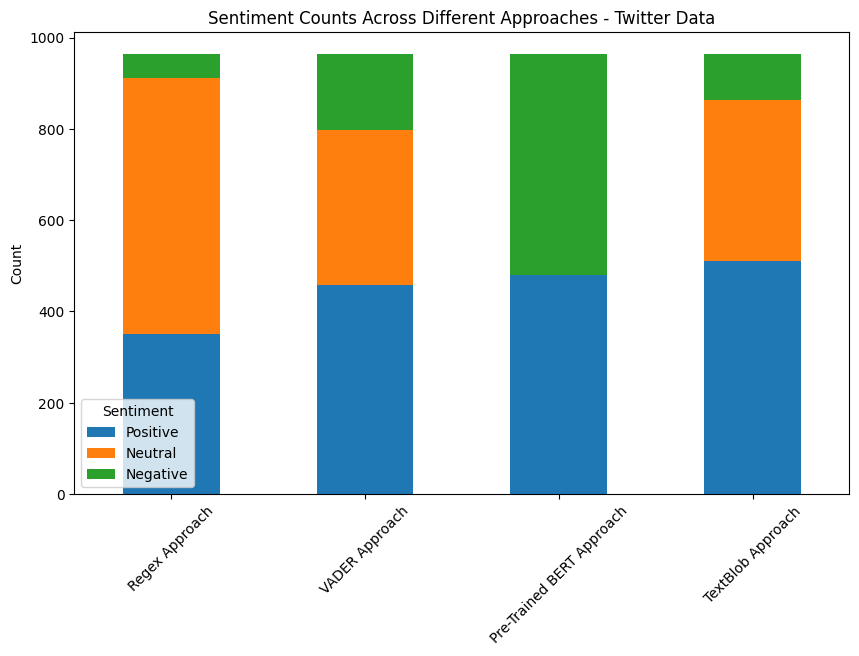

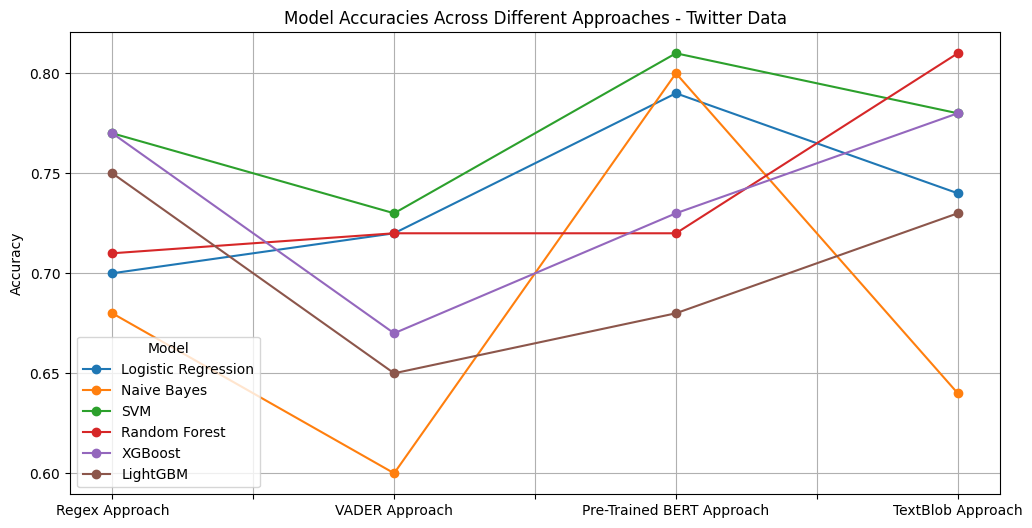

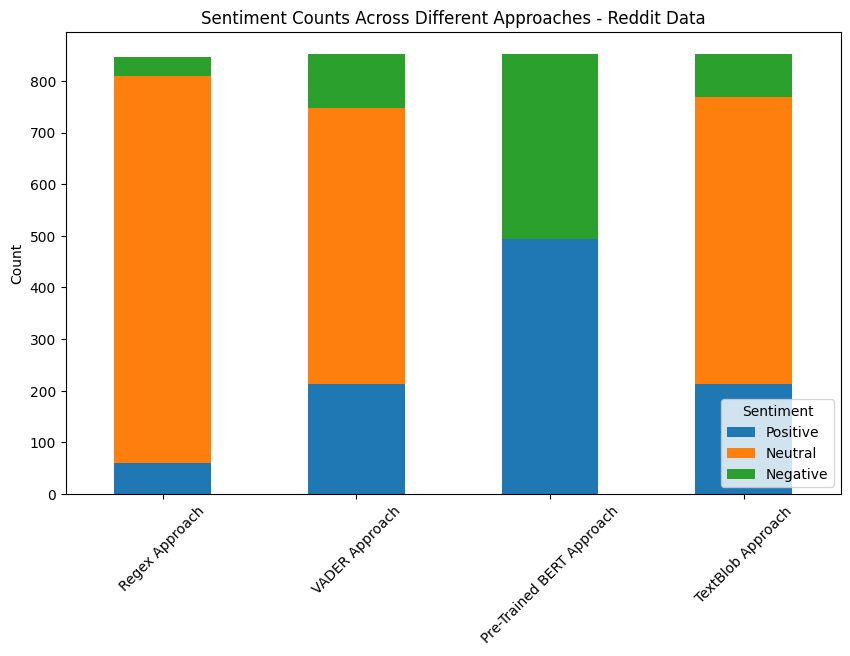

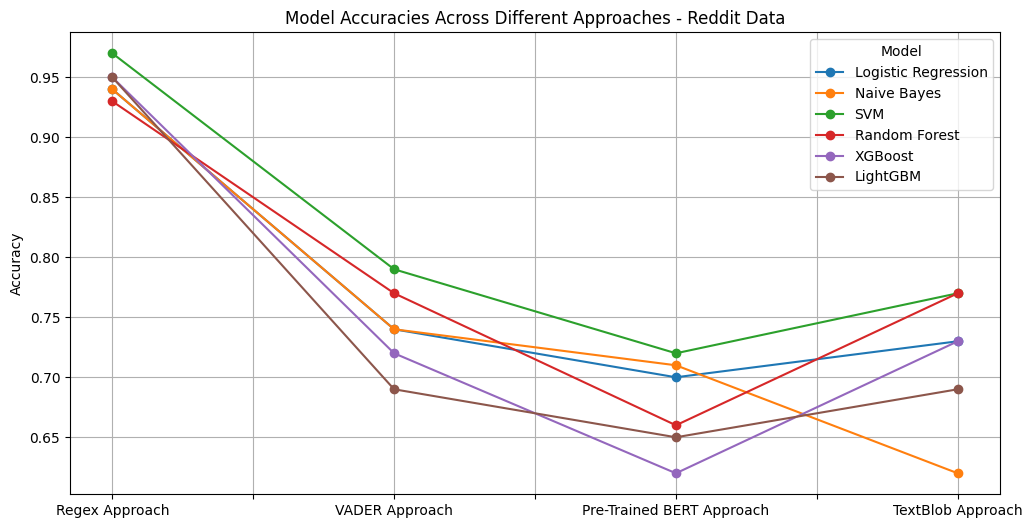

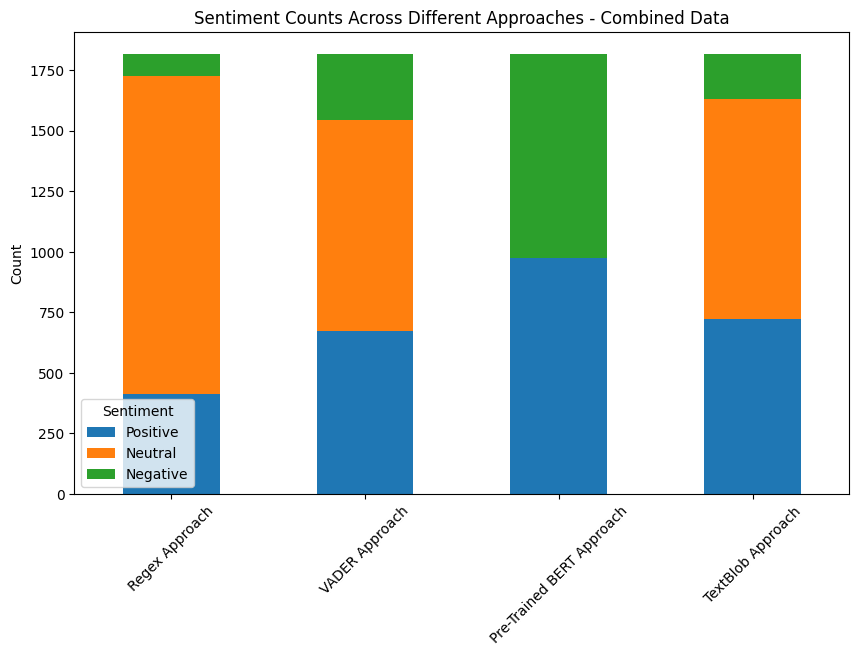

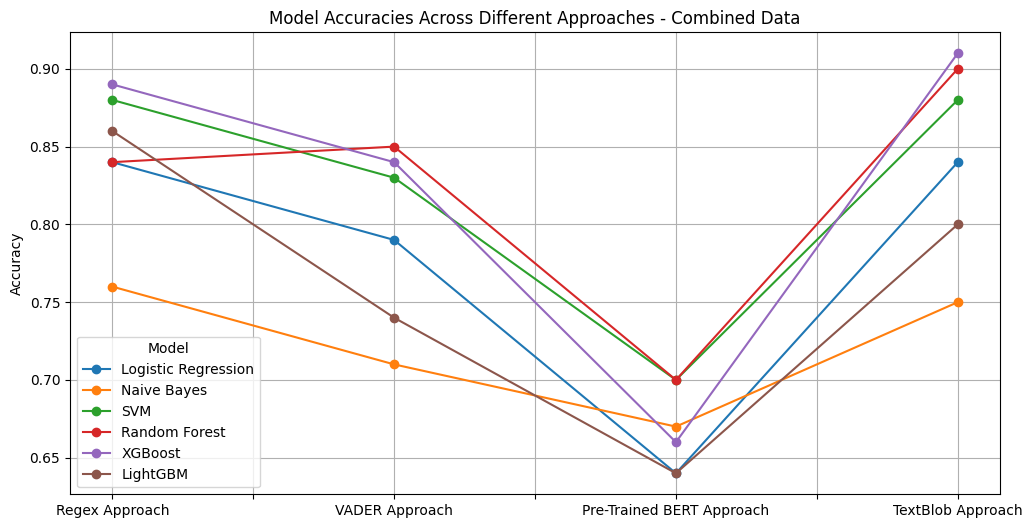

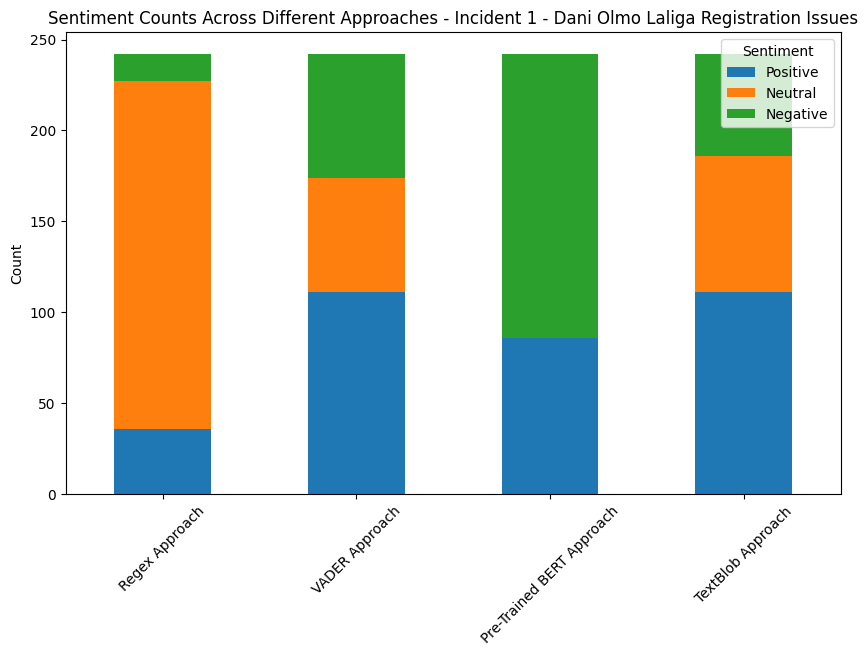

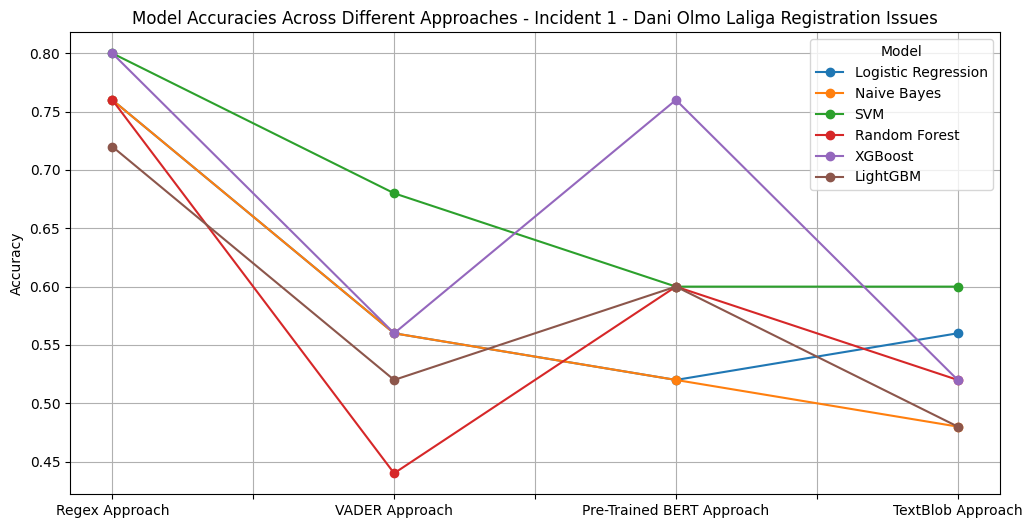

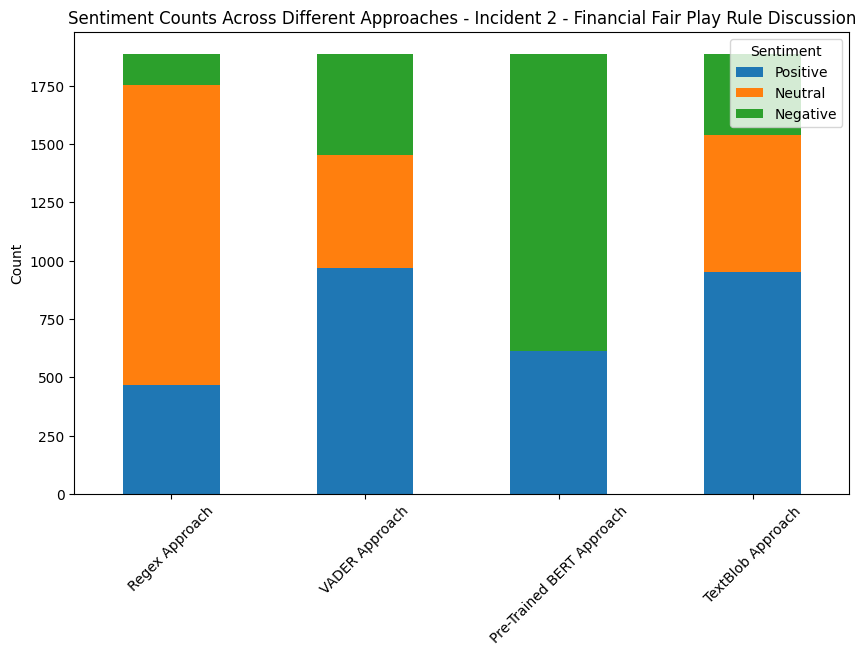

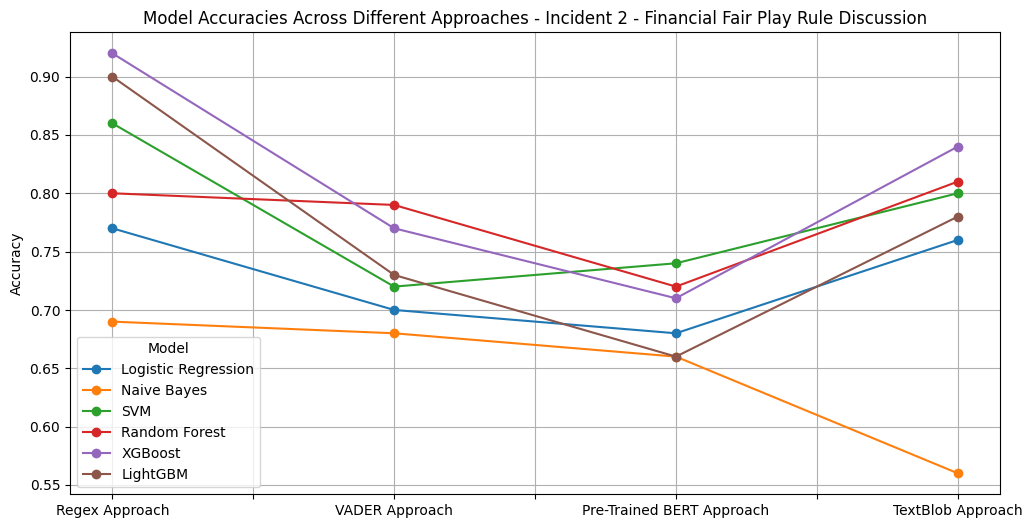

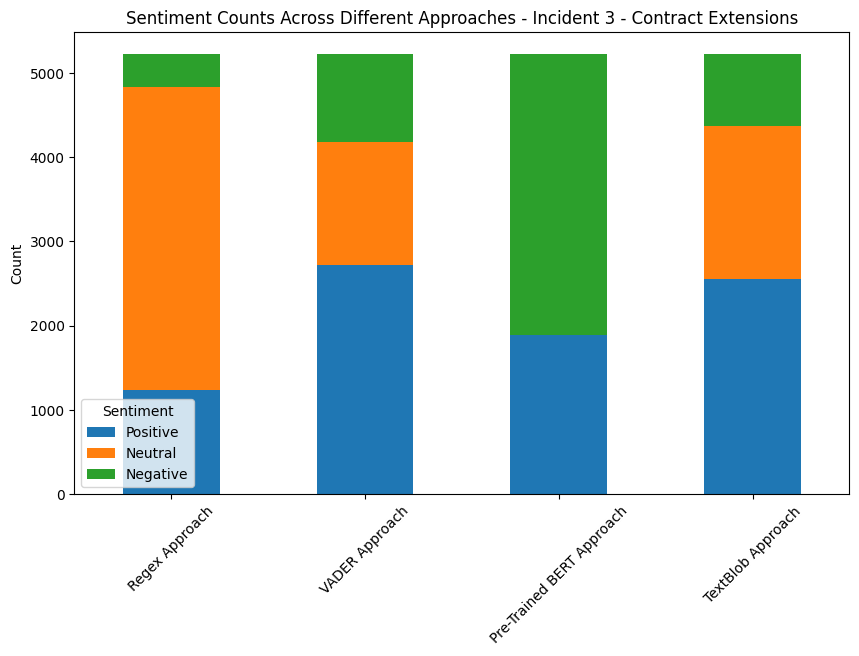

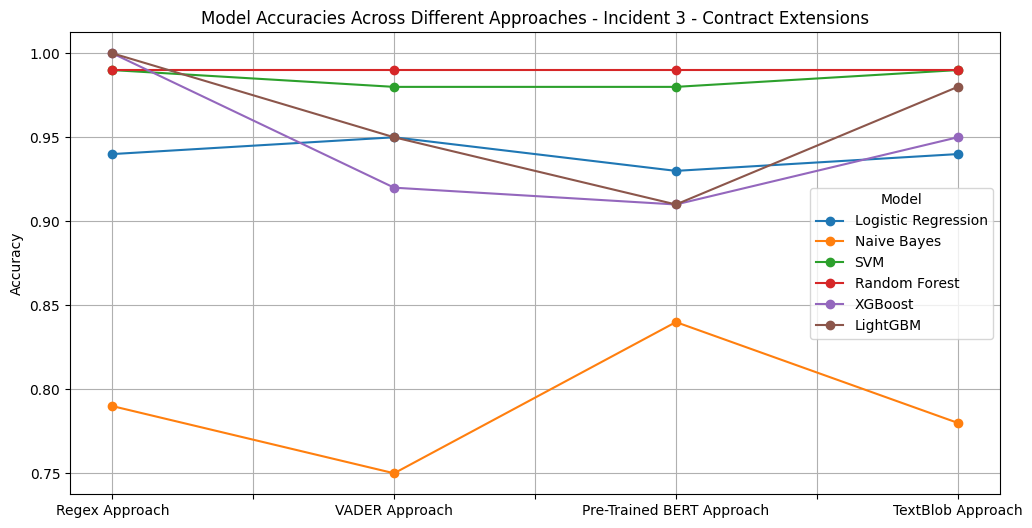

In [ ]:
# Example sentiment count data for four cases
# Replace these with actual counts from your data
sentiment_counts = {
    "Regex Approach": {"Positive": 351, "Neutral": 560, "Negative": 53},
    "VADER Approach": {"Positive": 458, "Neutral": 339, "Negative": 167},
    "Pre-Trained BERT Approach": {"Positive": 479, "Neutral": 0, "Negative": 485},
    "TextBlob Approach": {"Positive": 510, "Neutral": 353, "Negative": 101},
}

# Convert to a DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).T

# Plot sentiment counts
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Counts Across Different Approaches - Twitter Data")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)  # Set x-axis labels angle
plt.show()

# Example accuracy data for models across four cases
# Replace these with actual accuracies from your evaluations
model_accuracies = {
    "Logistic Regression": [0.70, 0.72, 0.79, 0.74],
    "Naive Bayes": [0.68, 0.60, 0.80, 0.64],
    "SVM": [0.77, 0.73, 0.81, 0.78],
    "Random Forest": [0.71, 0.72, 0.72, 0.81],
    "XGBoost": [0.77, 0.67, 0.73, 0.78],
    "LightGBM": [0.75, 0.65, 0.68, 0.73],
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(model_accuracies, index=["Regex Approach", "VADER Approach", "Pre-Trained BERT Approach", "TextBlob Approach"])

# Plot model accuracies
accuracy_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Model Accuracies Across Different Approaches - Twitter Data")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid()
plt.show()

# Example sentiment count data for four cases
# Replace these with actual counts from your data
sentiment_counts = {
    "Regex Approach": {"Positive": 60, "Neutral": 750, "Negative": 36},
    "VADER Approach": {"Positive": 214, "Neutral": 533, "Negative": 105},
    "Pre-Trained BERT Approach": {"Positive": 494, "Neutral": 0, "Negative": 358},
    "TextBlob Approach": {"Positive": 214, "Neutral": 555, "Negative": 83},
}

# Convert to a DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).T

# Plot sentiment counts
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Counts Across Different Approaches - Reddit Data")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)  # Set x-axis labels angle
plt.show()

# Example accuracy data for models across four cases
# Replace these with actual accuracies from your evaluations
model_accuracies = {
    "Logistic Regression": [0.94, 0.74, 0.70, 0.73],
    "Naive Bayes": [0.94, 0.74, 0.71, 0.62],
    "SVM": [0.97, 0.79, 0.72, 0.77],
    "Random Forest": [0.93, 0.77, 0.66, 0.77],
    "XGBoost": [0.95, 0.72, 0.62, 0.73],
    "LightGBM": [0.95, 0.69, 0.65, 0.69],
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(model_accuracies, index=["Regex Approach", "VADER Approach", "Pre-Trained BERT Approach", "TextBlob Approach"])

# Plot model accuracies
accuracy_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Model Accuracies Across Different Approaches - Reddit Data")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid()
plt.show()

# Example sentiment count data for four cases
# Replace these with actual counts from your data
sentiment_counts = {
    "Regex Approach": {"Positive": 411, "Neutral": 1316, "Negative": 89},
    "VADER Approach": {"Positive": 672, "Neutral": 872, "Negative": 272},
    "Pre-Trained BERT Approach": {"Positive": 973, "Neutral": 0, "Negative": 843},
    "TextBlob Approach": {"Positive": 724, "Neutral": 908, "Negative": 184},
}

# Convert to a DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).T

# Plot sentiment counts
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Counts Across Different Approaches - Combined Data")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)  # Set x-axis labels angle
plt.show()

# Example accuracy data for models across four cases
# Replace these with actual accuracies from your evaluations
model_accuracies = {
    "Logistic Regression": [0.84, 0.79, 0.64, 0.84],
    "Naive Bayes": [0.76, 0.71, 0.67, 0.75],
    "SVM": [0.88, 0.83, 0.70, 0.88],
    "Random Forest": [0.84, 0.85, 0.70, 0.90],
    "XGBoost": [0.89, 0.84, 0.66, 0.91],
    "LightGBM": [0.86, 0.74, 0.64, 0.80],
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(model_accuracies, index=["Regex Approach", "VADER Approach", "Pre-Trained BERT Approach", "TextBlob Approach"])

# Plot model accuracies
accuracy_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Model Accuracies Across Different Approaches - Combined Data")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid()
plt.show()

# Example sentiment count data for four cases
# Replace these with actual counts from your data
sentiment_counts = {
    "Regex Approach": {"Positive": 36, "Neutral": 191, "Negative": 15},
    "VADER Approach": {"Positive": 111, "Neutral": 63, "Negative": 68},
    "Pre-Trained BERT Approach": {"Positive": 86, "Neutral": 0, "Negative": 156},
    "TextBlob Approach": {"Positive": 111, "Neutral": 75, "Negative": 56},
}

# Convert to a DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).T

# Plot sentiment counts
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Counts Across Different Approaches - Incident 1 - Dani Olmo Laliga Registration Issues")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)  # Set x-axis labels angle
plt.show()

# Example accuracy data for models across four cases
# Replace these with actual accuracies from your evaluations
model_accuracies = {
    "Logistic Regression": [0.76, 0.56, 0.52, 0.56],
    "Naive Bayes": [0.76, 0.56, 0.52, 0.48],
    "SVM": [0.80, 0.68, 0.60, 0.60],
    "Random Forest": [0.76, 0.44, 0.60, 0.52],
    "XGBoost": [0.80, 0.56, 0.76, 0.52],
    "LightGBM": [0.72, 0.52, 0.60, 0.48],
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(model_accuracies, index=["Regex Approach", "VADER Approach", "Pre-Trained BERT Approach", "TextBlob Approach"])

# Plot model accuracies
accuracy_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Model Accuracies Across Different Approaches - Incident 1 - Dani Olmo Laliga Registration Issues")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid()
plt.show()

# Example sentiment count data for four cases
# Replace these with actual counts from your data
sentiment_counts = {
    "Regex Approach": {"Positive": 468, "Neutral": 1286, "Negative": 132},
    "VADER Approach": {"Positive": 971, "Neutral": 484, "Negative": 431},
    "Pre-Trained BERT Approach": {"Positive": 614, "Neutral": 0, "Negative": 1272},
    "TextBlob Approach": {"Positive": 952, "Neutral": 589, "Negative": 345},
}

# Convert to a DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).T

# Plot sentiment counts
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Counts Across Different Approaches - Incident 2 - Financial Fair Play Rule Discussion")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)  # Set x-axis labels angle
plt.show()

# Example accuracy data for models across four cases
# Replace these with actual accuracies from your evaluations
model_accuracies = {
    "Logistic Regression": [0.77, 0.70, 0.68, 0.76],
    "Naive Bayes": [0.69, 0.68, 0.66, 0.56],
    "SVM": [0.86, 0.72, 0.74, 0.80],
    "Random Forest": [0.80, 0.79, 0.72, 0.81],
    "XGBoost": [0.92, 0.77, 0.71, 0.84],
    "LightGBM": [0.90, 0.73, 0.66, 0.78],
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(model_accuracies, index=["Regex Approach", "VADER Approach", "Pre-Trained BERT Approach", "TextBlob Approach"])

# Plot model accuracies
accuracy_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Model Accuracies Across Different Approaches - Incident 2 - Financial Fair Play Rule Discussion")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid()
plt.show()

# Example sentiment count data for four cases
# Replace these with actual counts from your data
sentiment_counts = {
    "Regex Approach": {"Positive": 1232, "Neutral": 3601, "Negative": 392},
    "VADER Approach": {"Positive": 2723, "Neutral": 1452, "Negative": 1050},
    "Pre-Trained BERT Approach": {"Positive": 1887, "Neutral": 0, "Negative": 3338},
    "TextBlob Approach": {"Positive": 2557, "Neutral": 1819, "Negative": 849},
}

# Convert to a DataFrame
sentiment_df = pd.DataFrame(sentiment_counts).T

# Plot sentiment counts
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Counts Across Different Approaches - Incident 3 - Contract Extensions")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)  # Set x-axis labels angle
plt.show()

# Example accuracy data for models across four cases
# Replace these with actual accuracies from your evaluations
model_accuracies = {
    "Logistic Regression": [0.94, 0.95, 0.93, 0.94],
    "Naive Bayes": [0.79, 0.75, 0.84, 0.78],
    "SVM": [0.99, 0.98, 0.98, 0.99],
    "Random Forest": [0.99, 0.99, 0.99, 0.99],
    "XGBoost": [1.00, 0.92, 0.91, 0.95],
    "LightGBM": [1.00, 0.95, 0.91, 0.98],
}

# Convert to a DataFrame
accuracy_df = pd.DataFrame(model_accuracies, index=["Regex Approach", "VADER Approach", "Pre-Trained BERT Approach", "TextBlob Approach"])

# Plot model accuracies
accuracy_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Model Accuracies Across Different Approaches - Incident 3 - Contract Extensions")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid()
plt.show()